In [1]:
library(dplyr)

library(clusterProfiler)
library(ktplots)
library(fgsea)
library(msigdbr)





Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Registered S3 method overwritten by 'enrichplot':
  method               from
  fortify.enrichResult DOSE

clusterProfiler v3.14.3  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.

Loading required package: ggplot2

Loading required package: Rcpp



In [2]:
setwd('/Users/matthewcoates/Documents/Cambridge/R files/COVID scRNAseq nasal biopsy + blood/')

In [3]:
degs <- as.list(list.files('DEGs/120721/SevereCovVHealthy/', full.names= TRUE, pattern ='.csv'))

In [4]:
names(degs) <- gsub('DEGs/120721/SevereCovVHealthy/DEG_B_Naive_sCovH.csv', '', list.files('DEGs/120721/SevereCovVHealthy/',pattern ='.csv'))
names(degs) <- substr(names(degs), start = 1, stop = nchar(names(degs))-4)
names(degs)

[1] "DEG_B_follicular_sCovH"          "DEG_B_mem_nonswitched_sCovH"    
 [3] "DEG_B_mem_switched_sCovH"        "DEG_B_Naive_sCovH"              
 [5] "DEG_Baso_sCovH"                  "DEG_CD4_Act_sCovH"              
 [7] "DEG_CD4_Tcm_sCovH"               "DEG_CD4_Tem_sCovH"              
 [9] "DEG_CD4_Th17_sCovH"              "DEG_CD4_Th2_sCovH"              
[11] "DEG_CD4_Tn_sCovH"                "DEG_CD4_Trm_sCovH"              
[13] "DEG_CD8_CTL_sCovH"               "DEG_CD8_Tn_sCovH"               
[15] "DEG_CD8_Trm_sCovH"               "DEG_DC_c141_sCovH"              
[17] "DEG_DC_cCD1c_sCovH"              "DEG_DC_follicular_sCovH"        
[19] "DEG_DC_plasmacytoid_sCovH"       "DEG_Endo_Stromal_sCovH"         
[21] "DEG_Epi_Basal_sCovH"             "DEG_Epi_Ciliated_sCovH"         
[23] "DEG_Epi_secretory_sCovH"         "DEG_Epi_Squamous_sCovH"         
[25] "DEG_gdT_vd1_sCovH"               "DEG_gdT_vd2_sCovH"              
[27] "DEG_gdT_vd3_sCovH"               "DEG_ILC_sCovH"                  
[29] "DEG_Mac_nr_sCovH"                "DEG_Mac_r_sCovH"                
[31] "DEG_MAIT_sCovH"                  "DEG_Mast_sCovH"                 
[33] "DEG_Mega_sCovH"                  "DEG_Mono_classical_sCovH"       
[35] "DEG_Monocyte_nonclassical_sCovH" "DEG_NK_adaptive_sCovH"          
[37] "DEG_NK_CD16_sCovH"               "DEG_NK_CD56_sCovH"              
[39] "DEG_Plasma_blastIgM_sCovH"       "DEG_Plasma_sCovH"               
[41] "DEG_Tfh_sCovH"                   "DEG_Treg_sCovH"

In [5]:
degs <- lapply(degs, readr::read_csv)
degs <- degs[order(names(degs))]
degs

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_ad

Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  p_val = col_double(),
  avg_log2FC = col_double(),
  pct.1 = col_double(),
  pct.2 = col_double(),
  p_val_adj = col_double()
)

Warning message:
“Missing column names f

$DEG_B_follicular_sCovH
# A tibble: 15 x 6
   X1        p_val avg_log2FC pct.1 pct.2 p_val_adj
   <chr>     <dbl>      <dbl> <dbl> <dbl>     <dbl>
 1 IFI44L 1.80e-66       1.81 0.262 0.014  4.62e-62
 2 IFITM1 1.99e-44       1.52 0.637 0.353  5.11e-40
 3 LY6E   1.03e-33       1.27 0.49  0.225  2.65e-29
 4 MX1    2.88e-31       1.32 0.323 0.102  7.41e-27
 5 TXNIP  3.50e-30       1.04 0.667 0.416  8.98e-26
 6 IRF7   3.64e-25       1.02 0.269 0.087  9.35e-21
 7 JUNB   1.60e-23      -1.22 0.415 0.646  4.10e-19
 8 STAG3  7.27e-21       1.21 0.282 0.111  1.87e-16
 9 NR4A2  3.36e-19      -1.72 0.095 0.293  8.62e-15
10 CD83   4.46e-17      -1.13 0.359 0.547  1.14e-12
11 SLC2A3 9.77e-15      -1.22 0.232 0.411  2.51e-10
12 FOS    3.98e-13      -1.43 0.226 0.384  1.02e- 8
13 BTG2   3.46e-12      -1.02 0.258 0.424  8.89e- 8
14 EZR    5.32e-11      -1.18 0.381 0.524  1.37e- 6
15 YPEL5  1.74e- 8      -1.07 0.131 0.25   4.47e- 4

$DEG_B_mem_nonswitched_sCovH
# A tibble: 17 x 6
   X1        p_val avg_log2FC pct.1 pct.2 p_val_adj
   <chr>     <dbl>      <dbl> <dbl> <dbl>     <dbl>
 1 IFI44L 7.25e-65       1.89 0.276 0.014  1.86e-60
 2 LY6E   1.97e-34       1.35 0.5   0.199  5.06e-30
 3 IFITM1 9.48e-30       1.32 0.662 0.356  2.43e-25
 4 TXNIP  4.81e-26       1.14 0.617 0.334  1.24e-21
 5 MX1    6.72e-26       1.33 0.321 0.101  1.73e-21
 6 STAG3  1.82e-25       1.33 0.318 0.098  4.67e-21
 7 JUNB   6.65e-22      -1.66 0.396 0.616  1.71e-17
 8 NR4A2  4.85e-17      -1.84 0.078 0.309  1.24e-12
 9 EZR    1.09e-15      -1.52 0.331 0.549  2.79e-11
10 CD83   5.71e-15      -1.28 0.364 0.562  1.47e-10
11 BTG2   2.55e-12      -1.34 0.198 0.4    6.55e- 8
12 FOS    3.43e-11      -1.70 0.218 0.389  8.82e- 7
13 SLC2A3 1.36e-10      -1.25 0.218 0.397  3.49e- 6
14 REL    2.06e-10      -1.13 0.263 0.449  5.29e- 6
15 CD55   2.46e- 7      -1.23 0.185 0.316  6.31e- 3
16 SFPQ   2.01e- 6      -1.00 0.234 0.359  5.16e- 2
17 YPEL5  2.76e- 6      -1.00 0.166 0.285  7.08e- 2

$DEG_B_mem_switched_sCovH
# A tibble: 11 x 6
   X1           p_val avg_log2FC pct.1 pct.2 p_val_adj
   <chr>        <dbl>      <dbl> <dbl> <dbl>     <dbl>
 1 IFITM1   2.61e-231       1.32 0.562 0.338 6.71e-227
 2 LY6E     7.02e-188       1.08 0.427 0.218 1.80e-183
 3 NR4A2    3.78e-163      -1.71 0.067 0.263 9.70e-159
 4 STAG3    1.12e-146       1.14 0.275 0.112 2.87e-142
 5 BTG2     3.64e-125      -1.11 0.206 0.406 9.35e-121
 6 EZR      3.09e-120      -1.20 0.325 0.52  7.94e-116
 7 JUNB     5.09e-118      -1.14 0.393 0.564 1.31e-113
 8 HLA-DRB5 2.17e-112      -1.12 0.355 0.53  5.56e-108
 9 SLC2A3   1.48e-109      -1.09 0.189 0.371 3.79e-105
10 REL      2.79e-103      -1.04 0.276 0.454 7.15e- 99
11 FOS      2.46e- 98      -1.47 0.192 0.351 6.33e- 94

$DEG_B_Naive_sCovH
# A tibble: 25 x 6
   X1           p_val avg_log2FC pct.1 pct.2     p_val_adj
   <chr>        <dbl>      <dbl> <dbl> <dbl>         <dbl>
 1 IFITM1    1.43e-13       2.22 0.75  0.298 0.00000000368
 2 MX1       1.06e-11       1.78 0.411 0.056 0.000000273  
 3 HLA-B     3.28e-10       1.09 0.964 0.82  0.00000843   
 4 ISG15     3.84e- 9       1.09 0.321 0.039 0.0000987    
 5 XAF1      7.30e- 7       1.24 0.268 0.045 0.0187       
 6 LY6E      8.67e- 7       1.39 0.464 0.163 0.0223       
 7 TXNIP     5.26e- 6       1.19 0.589 0.298 0.135        
 8 LINC00926 8.58e- 6       1.45 0.5   0.23  0.220        
 9 STAG3     1.28e- 5       1.54 0.375 0.129 0.330        
10 FOS       1.55e- 4      -1.42 0.179 0.472 1            
# … with 15 more rows

$DEG_Baso_sCovH
# A tibble: 1,015 x 6
   X1             p_val avg_log2FC pct.1 pct.2 p_val_adj
   <chr>          <dbl>      <dbl> <dbl> <dbl>     <dbl>
 1 RHEX      0.00000280       2.53 0.667  0       0.0719
 2 CCR3      0.00000280       3.05 0.667  0       0.0719
 3 SLC35C2   0.00000280       2.53 0.667  0       0.0719
 4 FBXL12    0.00000280       3.12 0.667  0       0.0719
 5 LINC01871 0.000133         3.64 0.667  0.03    1     
 6 HEMK1     0.000133         2.46 0.667  0.03    1     
 7 NDUFB5  

In [6]:
# GSEA of hallmark signatures

m_df = msigdbr(species = "Homo sapiens", category = "H")
m_df <- split(m_df, m_df$gs_name)
m_df <- lapply(m_df, function(x) x$gene_symbol)
ranklist <- lapply(degs, function(x) {
  y <- grepl('^RPS|^RPL|^MRPL|^MPRS|MT-|^HB|^IG', x$X1)
  x <- x[!y, ]
  gl <- x %>% dplyr::select(X1, avg_log2FC, p_val)
  gl$neglog10pval <- -log10(gl$p_val)
  rank <- unlist(gl$neglog10pval*sign(gl$avg_log2FC))
  rank[which(rank == -Inf)] <- -308
  rank[which(rank == Inf)] <- 308
  names(rank) <- gl$X1
  rank <- rev(sort(rank))
  return(rank)
})

In [7]:
hallmark_res <- lapply(ranklist, function(x) tryCatch(fgsea(pathways = m_df, stats = x, nperm=10000, minSize = 0, maxSize = 1000), error = function(e) {return(NULL)}))
hallmark_res <- lapply(hallmark_res, data.frame)

Warning message in fgsea(pathways = m_df, stats = x, nperm = 10000, minSize = 0, :
“There are ties in the preranked stats (84.22% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(pathways = m_df, stats = x, nperm = 10000, minSize = 0, :
“There are ties in the preranked stats (3.12% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(pathways = m_df, stats = x, nperm = 10000, minSize = 0, :
“There are ties in the preranked stats (10.78% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(pathways = m_df, stats = x, nperm = 10000, minSize = 0, :
“There are ties in the preranked stats (74.87% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(pathways = m_df, stats = x, nperm = 10000, minSi

In [8]:
hallmark_res

$DEG_B_follicular_sCovH
                                    pathway        pval        padj         ES
1              HALLMARK_ALLOGRAFT_REJECTION 0.750372024 0.891066778  0.6428571
2                        HALLMARK_APOPTOSIS 0.900330033 0.933883036  0.4122089
3                       HALLMARK_COMPLEMENT 0.750372024 0.891066778  0.6428571
4          HALLMARK_ESTROGEN_RESPONSE_EARLY 0.615860517 0.891066778 -0.7142857
5           HALLMARK_ESTROGEN_RESPONSE_LATE 0.615860517 0.891066778 -0.7142857
6                  HALLMARK_HEME_METABOLISM 0.636671505 0.891066778 -0.5384615
7                          HALLMARK_HYPOXIA 0.226415094 0.537735849 -0.7692308
8              HALLMARK_IL2_STAT5_SIGNALING 0.132075472 0.358490566 -0.8461538
9            HALLMARK_INFLAMMATORY_RESPONSE 0.284904014 0.601464029  0.6254764
10       HALLMARK_INTERFERON_ALPHA_RESPONSE 0.000405077 0.003848231  1.0000000
11       HALLMARK_INTERFERON_GAMMA_RESPONSE 0.006284039 0.039798911  0.9000000
12               HALLMARK_KRAS_SIGNALING_DN 0.667225248 0.891066778  0.4578715
13                 HALLMARK_MITOTIC_SPINDLE 0.867266592 0.933883036 -0.5714286
14                HALLMARK_MTORC1_SIGNALING 0.345670053 0.656773101 -0.6923077
15                     HALLMARK_P53_PATHWAY 0.933883036 0.933883036  0.3333333
16 HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY 0.121484814 0.358490566 -1.0000000
17              HALLMARK_TGF_BETA_SIGNALING 0.121484814 0.358490566 -1.0000000
18         HALLMARK_TNFA_SIGNALING_VIA_NFKB 0.000376506 0.003848231 -1.0000000
19                  HALLMARK_UV_RESPONSE_UP 0.127125732 0.358490566 -0.7500000
          NES nMoreExtreme size                            leadingEdge
1   0.9415325         4033    1                                   IRF7
2   0.6568013         5455    2                            TXNIP, BTG2
3   0.9415325         4033    1                                   IRF7
4  -1.0507546         3284    1                                    FOS
5  -1.0507546         3284    1                                    FOS
6  -0.9214652         2631    2                            BTG2, YPEL5
7  -1.3163789          935    2                            SLC2A3, FOS
8  -1.4480168          545    2                           CD83, SLC2A3
9   1.1615856         1958    4                     IFITM1, LY6E, IRF7
10  1.9950611            2    6 IFI44L, IFITM1, LY6E, MX1, TXNIP, IRF7
11  1.7456886           44    5         IFI44L, LY6E, MX1, TXNIP, IRF7
12  0.8881123         4777    5                     IFI44L, MX1, STAG3
13 -0.8406037         4625    1                                    EZR
14 -1.1847410         1428    2                           SLC2A3, BTG2
15  0.5815321         6115    3                       TXNIP, BTG2, FOS
16 -1.4710565          647    1                                   JUNB
17 -1.4710565          647    1                                   JUNB
18 -2.4849528            0    6   JUNB, NR4A2, CD83, SLC2A3, FOS, BTG2
19 -1.4999821          455    3                        JUNB, FOS, BTG2

$DEG_B_mem_nonswitched_sCovH
                                    pathway        pval        padj         ES
1                        HALLMARK_APOPTOSIS 0.776899798 0.984073078  0.4859070
2                       HALLMARK_COMPLEMENT 1.000000000 1.000000000  0.0000000
3          HALLMARK_ESTROGEN_RESPONSE_EARLY 0.671860334 0.911810453 -0.6875000
4           HALLMARK_ESTROGEN_RESPONSE_LATE 0.671860334 0.911810453 -0.6875000
5                   HALLMARK_G2M_CHECKPOINT 0.890645837 0.995399686  0.5625000
6                  HALLMARK_HEME_METABOLISM 0.897227533 0.995399686 -0.4092190
7                          HALLMARK_HYPOXIA 0.483986616 0.766312141 -0.6666667
8              HALLMARK_IL2_STAT5_SIGNALING 0.483986616 0.766312141 -0.6666667
9            HALLMARK_INFLAMMATORY_RESPONSE 0.186688802 0.506726747  0.6981605
10       HALLMARK_INTERFERON_ALPHA_RESPONSE 0.000145518 0.002764843  1.0000000
11       HALLMARK_INTERFERON_GAMMA_RESPONSE 0.006036825 0.038233223  0.923076

In [9]:
summary(hallmark_res)

                                Length Class      Mode
DEG_B_follicular_sCovH          8      data.frame list
DEG_B_mem_nonswitched_sCovH     8      data.frame list
DEG_B_mem_switched_sCovH        8      data.frame list
DEG_B_Naive_sCovH               8      data.frame list
DEG_Baso_sCovH                  8      data.frame list
DEG_CD4_Act_sCovH               8      data.frame list
DEG_CD4_Tcm_sCovH               8      data.frame list
DEG_CD4_Tem_sCovH               8      data.frame list
DEG_CD4_Th17_sCovH              8      data.frame list
DEG_CD4_Th2_sCovH               8      data.frame list
DEG_CD4_Tn_sCovH                8      data.frame list
DEG_CD4_Trm_sCovH               8      data.frame list
DEG_CD8_CTL_sCovH               8      data.frame list
DEG_CD8_Tn_sCovH                8      data.frame list
DEG_CD8_Trm_sCovH               8      data.frame list
DEG_DC_c141_sCovH               8      data.frame list
DEG_DC_cCD1c_sCovH              8      data.frame list
DEG_DC_fol

In [10]:
hallmark_res[[1]]

pathway                                  pval        padj        ES        
1  HALLMARK_ALLOGRAFT_REJECTION             0.750372024 0.891066778  0.6428571
2  HALLMARK_APOPTOSIS                       0.900330033 0.933883036  0.4122089
3  HALLMARK_COMPLEMENT                      0.750372024 0.891066778  0.6428571
4  HALLMARK_ESTROGEN_RESPONSE_EARLY         0.615860517 0.891066778 -0.7142857
5  HALLMARK_ESTROGEN_RESPONSE_LATE          0.615860517 0.891066778 -0.7142857
6  HALLMARK_HEME_METABOLISM                 0.636671505 0.891066778 -0.5384615
7  HALLMARK_HYPOXIA                         0.226415094 0.537735849 -0.7692308
8  HALLMARK_IL2_STAT5_SIGNALING             0.132075472 0.358490566 -0.8461538
9  HALLMARK_INFLAMMATORY_RESPONSE           0.284904014 0.601464029  0.6254764
10 HALLMARK_INTERFERON_ALPHA_RESPONSE       0.000405077 0.003848231  1.0000000
11 HALLMARK_INTERFERON_GAMMA_RESPONSE       0.006284039 0.039798911  0.9000000
12 HALLMARK_KRAS_SIGNALING_DN               0.667225248 0.891066778  0.4578715
13 HALLMARK_MITOTIC_SPINDLE                 0.867266592 0.933883036 -0.5714286
14 HALLMARK_MTORC1_SIGNALING                0.345670053 0.656773101 -0.6923077
15 HALLMARK_P53_PATHWAY                     0.933883036 0.933883036  0.3333333
16 HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY 0.121484814 0.358490566 -1.0000000
17 HALLMARK_TGF_BETA_SIGNALING              0.121484814 0.358490566 -1.0000000
18 HALLMARK_TNFA_SIGNALING_VIA_NFKB         0.000376506 0.003848231 -1.0000000
19 HALLMARK_UV_RESPONSE_UP                  0.127125732 0.358490566 -0.7500000
   NES        nMoreExtreme size leadingEdge                                   
1   0.9415325 4033         1    IRF7                                          
2   0.6568013 5455         2    TXNIP, BTG2                                   
3   0.9415325 4033         1    IRF7                                          
4  -1.0507546 3284         1    FOS                                           
5  -1.0507546 3284         1    FOS                                           
6  -0.9214652 2631         2    BTG2 , YPEL5                                  
7  -1.3163789  935         2    SLC2A3, FOS                                   
8  -1.4480168  545         2    CD83  , SLC2A3                                
9   1.1615856 1958         4    IFITM1, LY6E  , IRF7                          
10  1.9950611    2         6    IFI44L, IFITM1, LY6E  , MX1   , TXNIP , IRF7  
11  1.7456886   44         5    IFI44L, LY6E  , MX1   , TXNIP , IRF7          
12  0.8881123 4777         5    IFI44L, MX1   , STAG3                         
13 -0.8406037 4625         1    EZR                                           
14 -1.1847410 1428         2    SLC2A3, BTG2                                  
15  0.5815321 6115         3    TXNIP, BTG2 , FOS                             
16 -1.4710565  647         1    JUNB                                          
17 -1.4710565  647         1    JUNB                                          
18 -2.4849528    0         6    JUNB  , NR4A2 , CD83  , SLC2A3, FOS   , BTG2  
19 -1.4999821  455         3    JUNB, FOS , BTG2

In [11]:
plot_GSEA <- function(gsea,
                       filename,
                      h = 3, w = 5) {
  require(ggplot2)
  gsea$pathway <- gsub("HALLMARK_", "", gsea$pathway)
  gsea$pathway <- gsub("_", " ", gsea$pathway)
  gsea$pathway <- tools::toTitleCase(tolower(gsea$pathway))
  gsea$pathway <- factor(gsea$pathway, levels = unique(gsea$pathway))
  gsea$NES[which(is.na(gsea$NES))] <- 0
  gsea$pval[which(gsea$pval == 0)] <- 0.001
  gsea$pval[which(gsea$pval == 1)] <- 0.99999
  gsea$padj[which(gsea$padj == 0)] <- 0.001
  gsea$padj[which(gsea$padj == 1)] <- 0.99999
  gsea <- gsea[-which(gsea$pval >= 0.05), ]
  gsea$ranking <- -log10(gsea$pval)*sign(gsea$NES)
  gsea <- gsea[order(gsea$ranking), ]
  x_lim_min <- abs(ceiling(min(-log10(gsea$pval))))
  x_lim_max <- abs(ceiling(max(-log10(gsea$pval))))
  if(x_lim_min > x_lim_max){
    xval1 <- x_lim_min * -1
    xval2 <- x_lim_min
  } else {
    xval1 <- x_lim_max * -1
    xval2 <- x_lim_max
  }
  g <- ggplot(gsea, aes(x = ranking, y = reorder(pathway, ranking), col = padj, size = abs(NES))) +
    geom_point(alpha = 0.8) +
    scale_color_gradientn(
      colours = c(
        # rev(colorRampPalette(RColorBrewer::brewer.pal(9, 'YlGnBu'))(125)),
        viridis::viridis(125, direction = -1),
        rep("#E7E7E7", 375)), limits = c(0:1)) +
    labs(x = expression(paste("Signed", " -log" ["10"], "pval")), y = "Hallmarks") +
    scale_y_discrete(labels = gsea$pathway) +
    theme_bw() +
    geom_vline(xintercept = 0, linetype="dashed", alpha = 0.5) +
    geom_vline(xintercept = -log10(0.25), linetype="dashed", col = '#F28E2B', alpha = 0.5) +
    geom_vline(xintercept = -log10(0.25)*-1, linetype="dashed", col = '#F28E2B', alpha = 0.5) +
    theme(
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      axis.line = element_line(colour = "black")) +
    # annotate("rect", xmin=-Inf, xmax=0, ymin=0, ymax=Inf, alpha = 0.1) +
    xlim(xval1, xval2) +
    scale_radius(range = c(3,7)) +
    coord_cartesian(clip = 'off') + small_guide() + small_legend(keysize=.5) +
    ggtitle(names(ranklist)[i])
  return(g)
   ggsave(file = filename, plot = g, device = 'pdf', useDingbats = FALSE, h = h, w = w)
}



In [12]:
names(ranklist)

[1] "DEG_B_follicular_sCovH"          "DEG_B_mem_nonswitched_sCovH"    
 [3] "DEG_B_mem_switched_sCovH"        "DEG_B_Naive_sCovH"              
 [5] "DEG_Baso_sCovH"                  "DEG_CD4_Act_sCovH"              
 [7] "DEG_CD4_Tcm_sCovH"               "DEG_CD4_Tem_sCovH"              
 [9] "DEG_CD4_Th17_sCovH"              "DEG_CD4_Th2_sCovH"              
[11] "DEG_CD4_Tn_sCovH"                "DEG_CD4_Trm_sCovH"              
[13] "DEG_CD8_CTL_sCovH"               "DEG_CD8_Tn_sCovH"               
[15] "DEG_CD8_Trm_sCovH"               "DEG_DC_c141_sCovH"              
[17] "DEG_DC_cCD1c_sCovH"              "DEG_DC_follicular_sCovH"        
[19] "DEG_DC_plasmacytoid_sCovH"       "DEG_Endo_Stromal_sCovH"         
[21] "DEG_Epi_Basal_sCovH"             "DEG_Epi_Ciliated_sCovH"         
[23] "DEG_Epi_secretory_sCovH"         "DEG_Epi_Squamous_sCovH"         
[25] "DEG_gdT_vd1_sCovH"               "DEG_gdT_vd2_sCovH"              
[27] "DEG_gdT_vd3_sCovH"               "DEG_ILC_sCovH"                  
[29] "DEG_Mac_nr_sCovH"                "DEG_Mac_r_sCovH"                
[31] "DEG_MAIT_sCovH"                  "DEG_Mast_sCovH"                 
[33] "DEG_Mega_sCovH"                  "DEG_Mono_classical_sCovH"       
[35] "DEG_Monocyte_nonclassical_sCovH" "DEG_NK_adaptive_sCovH"          
[37] "DEG_NK_CD16_sCovH"               "DEG_NK_CD56_sCovH"              
[39] "DEG_Plasma_blastIgM_sCovH"       "DEG_Plasma_sCovH"               
[41] "DEG_Tfh_sCovH"                   "DEG_Treg_sCovH"

In [18]:
names(ranklist[9])

[1] "DEG_CD4_Th17_sCovH"

In [14]:
hallmark_res

$DEG_B_follicular_sCovH
                                    pathway        pval        padj         ES
1              HALLMARK_ALLOGRAFT_REJECTION 0.750372024 0.891066778  0.6428571
2                        HALLMARK_APOPTOSIS 0.900330033 0.933883036  0.4122089
3                       HALLMARK_COMPLEMENT 0.750372024 0.891066778  0.6428571
4          HALLMARK_ESTROGEN_RESPONSE_EARLY 0.615860517 0.891066778 -0.7142857
5           HALLMARK_ESTROGEN_RESPONSE_LATE 0.615860517 0.891066778 -0.7142857
6                  HALLMARK_HEME_METABOLISM 0.636671505 0.891066778 -0.5384615
7                          HALLMARK_HYPOXIA 0.226415094 0.537735849 -0.7692308
8              HALLMARK_IL2_STAT5_SIGNALING 0.132075472 0.358490566 -0.8461538
9            HALLMARK_INFLAMMATORY_RESPONSE 0.284904014 0.601464029  0.6254764
10       HALLMARK_INTERFERON_ALPHA_RESPONSE 0.000405077 0.003848231  1.0000000
11       HALLMARK_INTERFERON_GAMMA_RESPONSE 0.006284039 0.039798911  0.9000000
12               HALLMARK_KRAS_SIGNALING_DN 0.667225248 0.891066778  0.4578715
13                 HALLMARK_MITOTIC_SPINDLE 0.867266592 0.933883036 -0.5714286
14                HALLMARK_MTORC1_SIGNALING 0.345670053 0.656773101 -0.6923077
15                     HALLMARK_P53_PATHWAY 0.933883036 0.933883036  0.3333333
16 HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY 0.121484814 0.358490566 -1.0000000
17              HALLMARK_TGF_BETA_SIGNALING 0.121484814 0.358490566 -1.0000000
18         HALLMARK_TNFA_SIGNALING_VIA_NFKB 0.000376506 0.003848231 -1.0000000
19                  HALLMARK_UV_RESPONSE_UP 0.127125732 0.358490566 -0.7500000
          NES nMoreExtreme size                            leadingEdge
1   0.9415325         4033    1                                   IRF7
2   0.6568013         5455    2                            TXNIP, BTG2
3   0.9415325         4033    1                                   IRF7
4  -1.0507546         3284    1                                    FOS
5  -1.0507546         3284    1                                    FOS
6  -0.9214652         2631    2                            BTG2, YPEL5
7  -1.3163789          935    2                            SLC2A3, FOS
8  -1.4480168          545    2                           CD83, SLC2A3
9   1.1615856         1958    4                     IFITM1, LY6E, IRF7
10  1.9950611            2    6 IFI44L, IFITM1, LY6E, MX1, TXNIP, IRF7
11  1.7456886           44    5         IFI44L, LY6E, MX1, TXNIP, IRF7
12  0.8881123         4777    5                     IFI44L, MX1, STAG3
13 -0.8406037         4625    1                                    EZR
14 -1.1847410         1428    2                           SLC2A3, BTG2
15  0.5815321         6115    3                       TXNIP, BTG2, FOS
16 -1.4710565          647    1                                   JUNB
17 -1.4710565          647    1                                   JUNB
18 -2.4849528            0    6   JUNB, NR4A2, CD83, SLC2A3, FOS, BTG2
19 -1.4999821          455    3                        JUNB, FOS, BTG2

$DEG_B_mem_nonswitched_sCovH
                                    pathway        pval        padj         ES
1                        HALLMARK_APOPTOSIS 0.776899798 0.984073078  0.4859070
2                       HALLMARK_COMPLEMENT 1.000000000 1.000000000  0.0000000
3          HALLMARK_ESTROGEN_RESPONSE_EARLY 0.671860334 0.911810453 -0.6875000
4           HALLMARK_ESTROGEN_RESPONSE_LATE 0.671860334 0.911810453 -0.6875000
5                   HALLMARK_G2M_CHECKPOINT 0.890645837 0.995399686  0.5625000
6                  HALLMARK_HEME_METABOLISM 0.897227533 0.995399686 -0.4092190
7                          HALLMARK_HYPOXIA 0.483986616 0.766312141 -0.6666667
8              HALLMARK_IL2_STAT5_SIGNALING 0.483986616 0.766312141 -0.6666667
9            HALLMARK_INFLAMMATORY_RESPONSE 0.186688802 0.506726747  0.6981605
10       HALLMARK_INTERFERON_ALPHA_RESPONSE 0.000145518 0.002764843  1.0000000
11       HALLMARK_INTERFERON_GAMMA_RESPONSE 0.006036825 0.038233223  0.923076

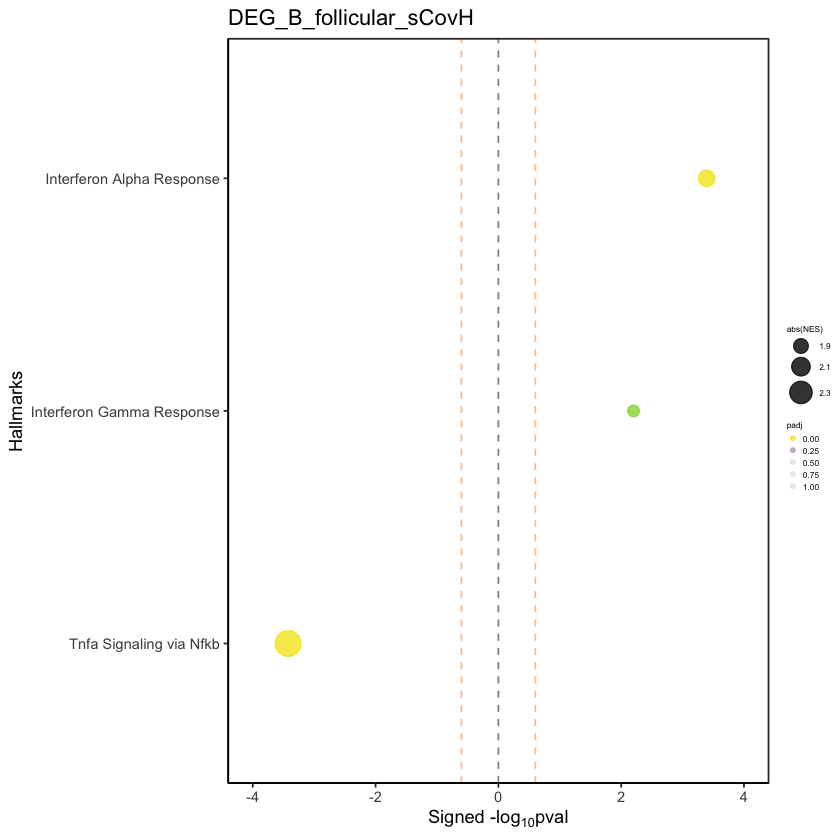

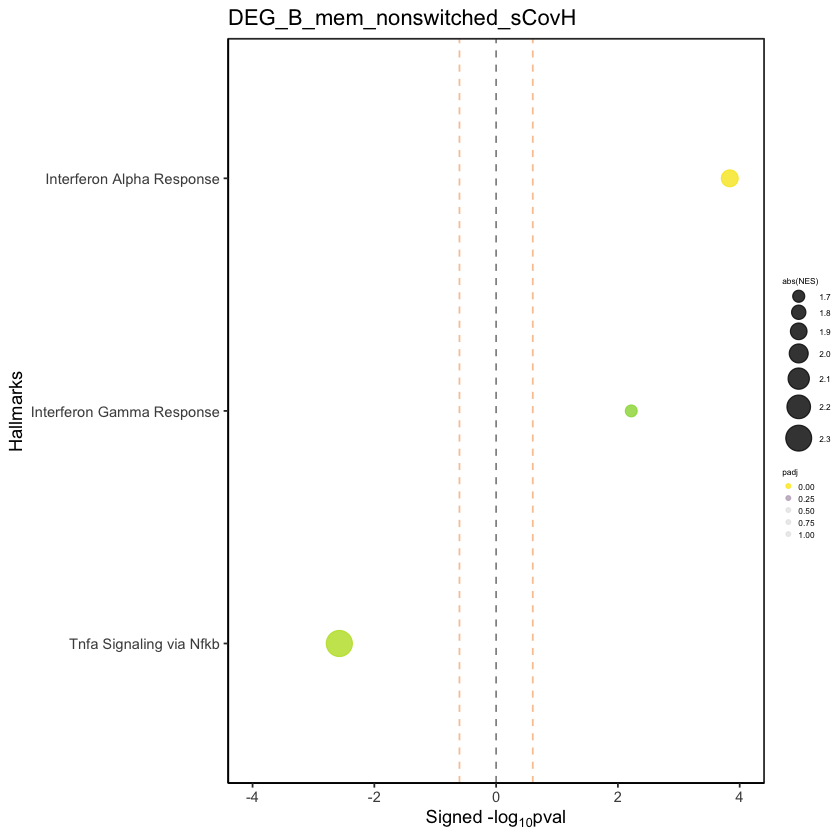

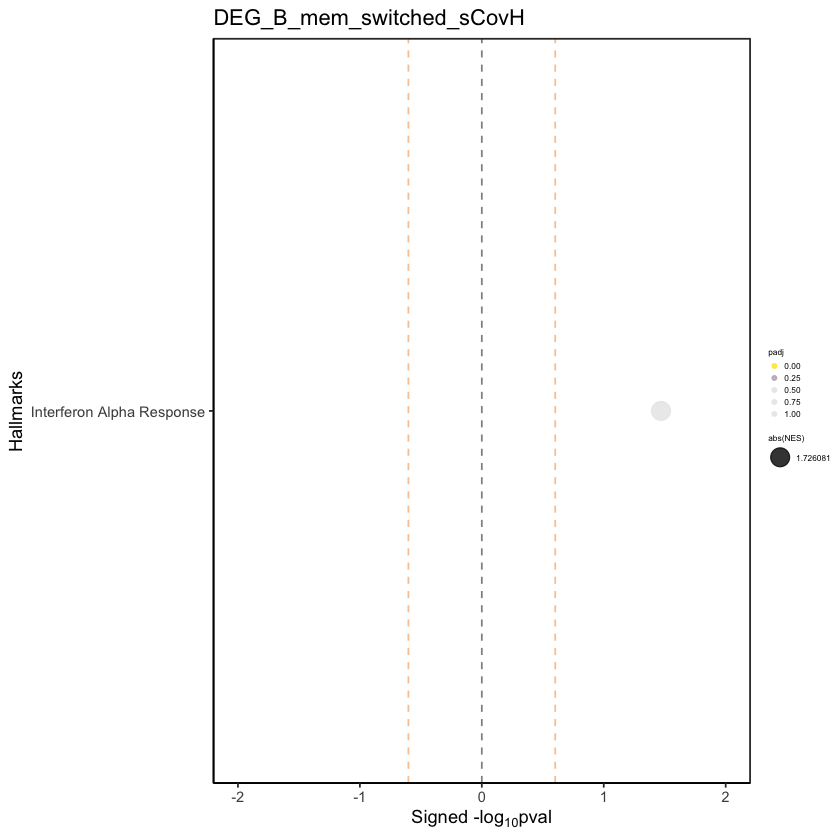

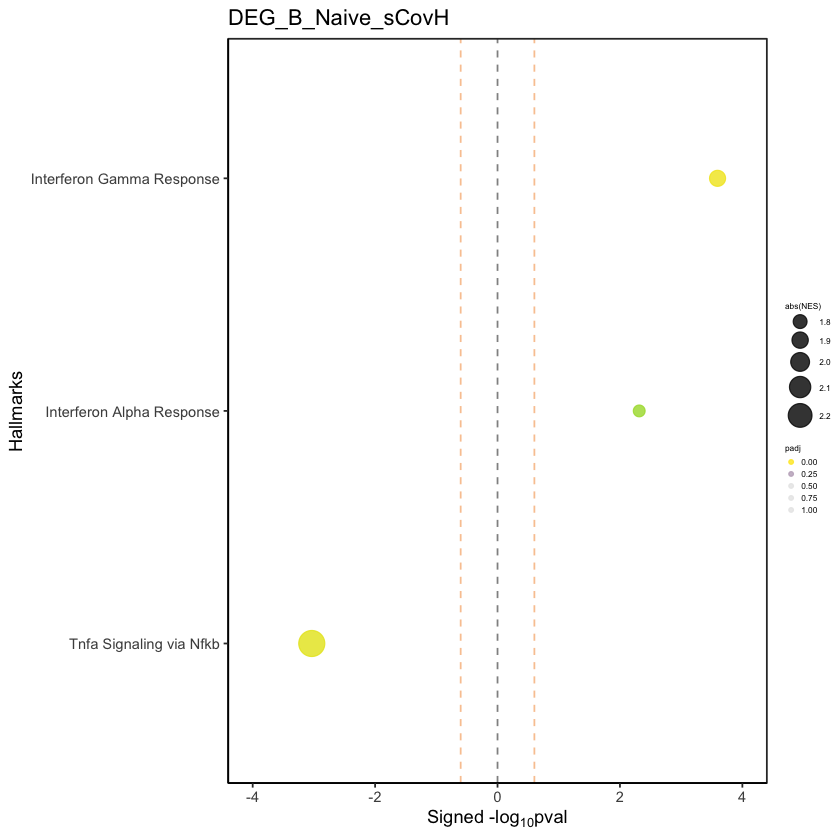

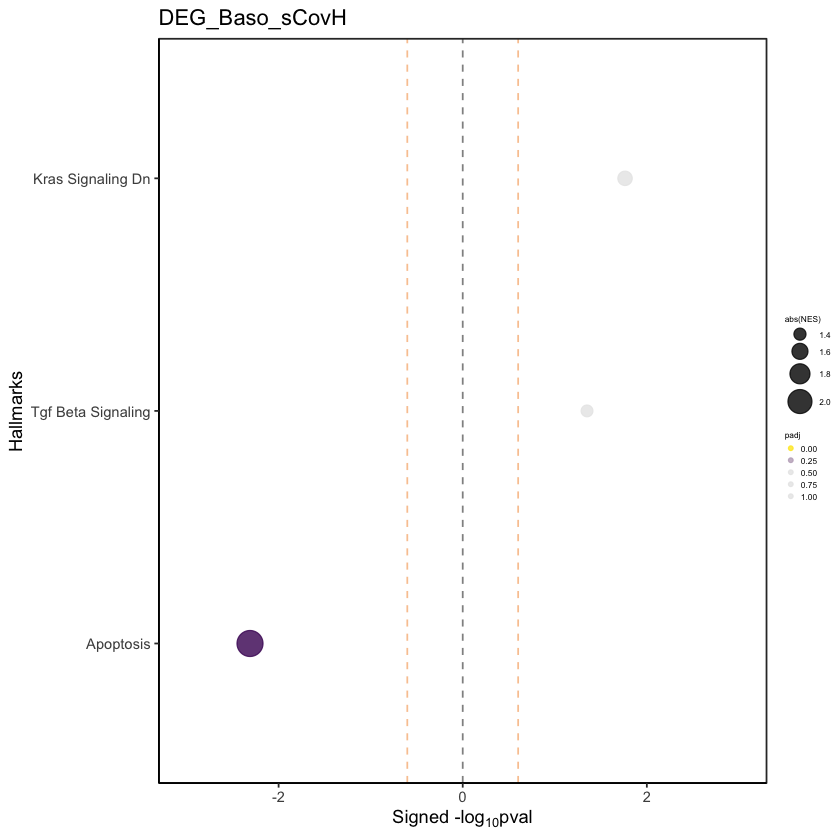

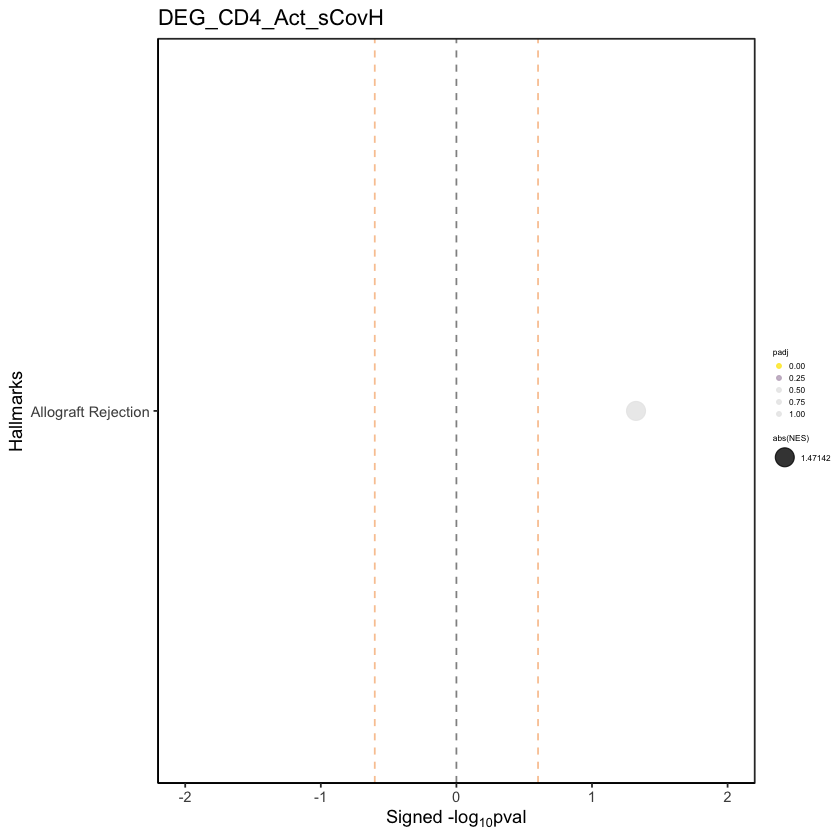

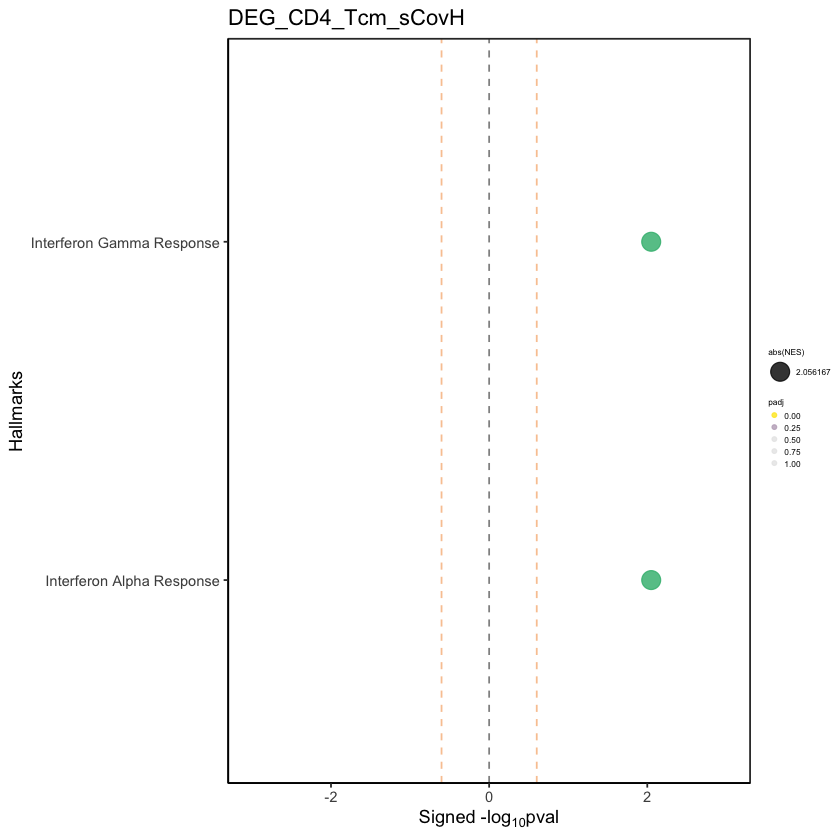

Warning message in min(-log10(gsea$pval)):
“no non-missing arguments to min; returning Inf”
Warning message in max(-log10(gsea$pval)):
“no non-missing arguments to max; returning -Inf”


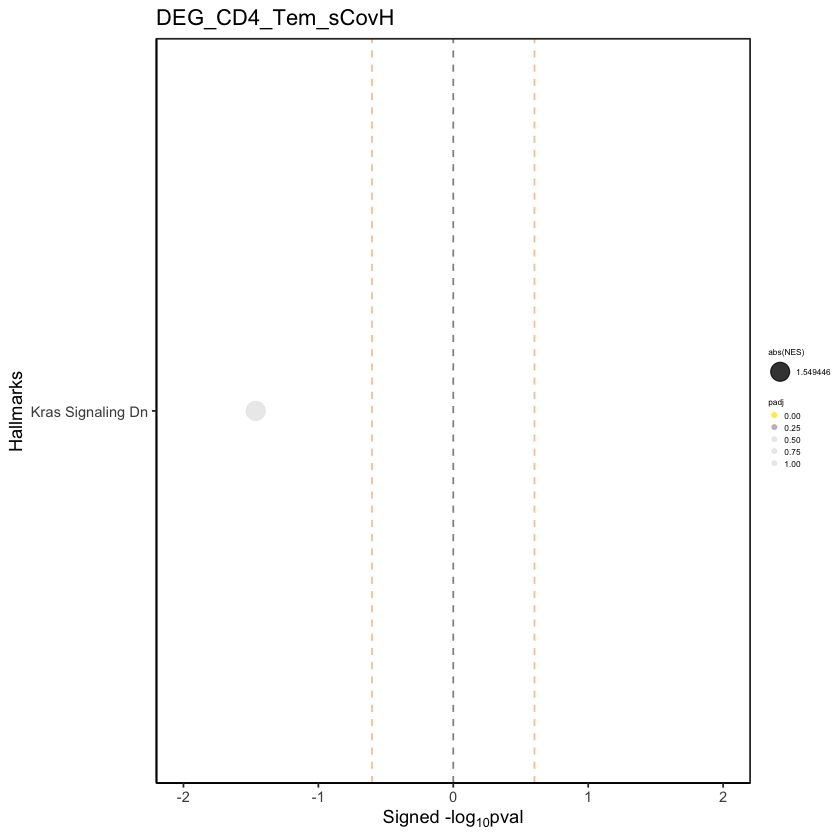

Warning message in rep(yes, length.out = len):
“'x' is NULL so the result will be NULL”


ERROR: Error in ans[ypos] <- rep(yes, length.out = len)[ypos]: replacement has length zero


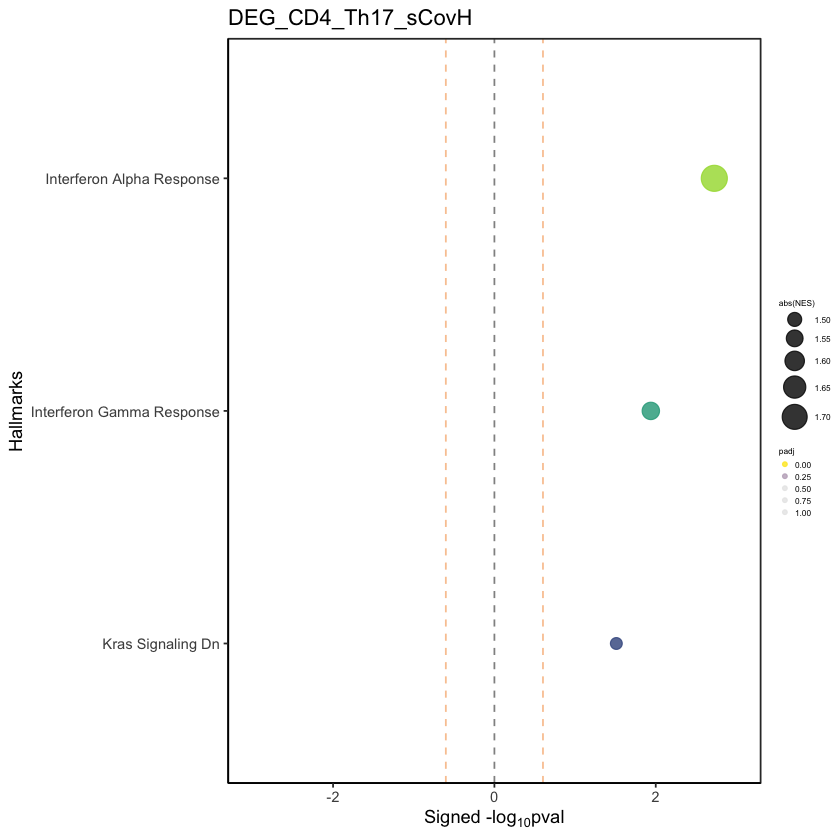

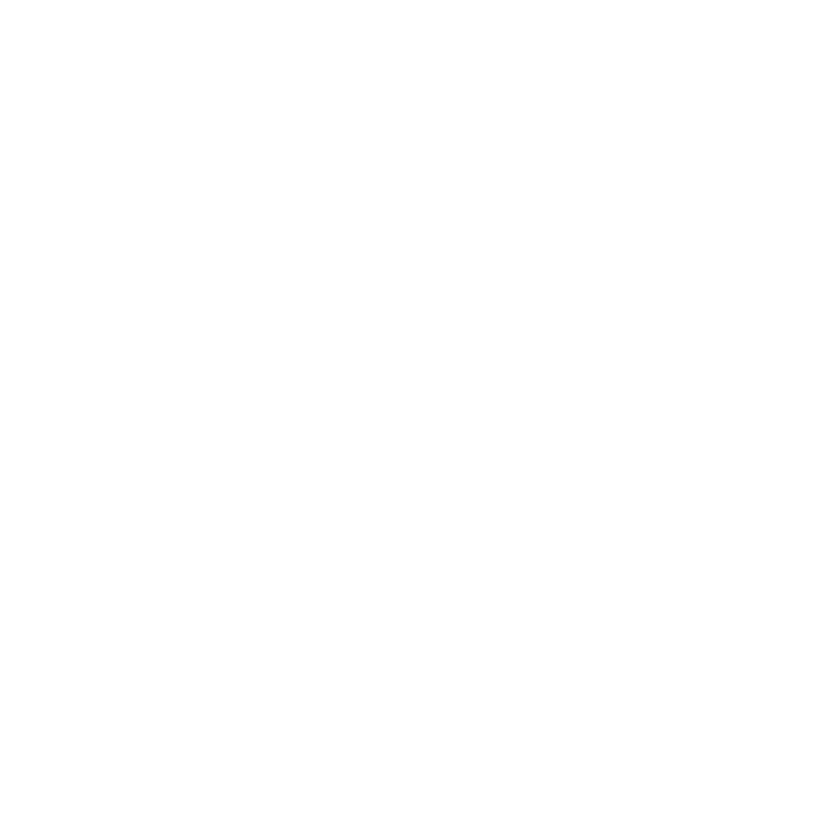

In [15]:
for (i in 1:length(ranklist)){
  plot <- tryCatch(expr = hallmark_res)
  plot <- plot_GSEA(hallmark_res[[i]])
    print(plot)
}

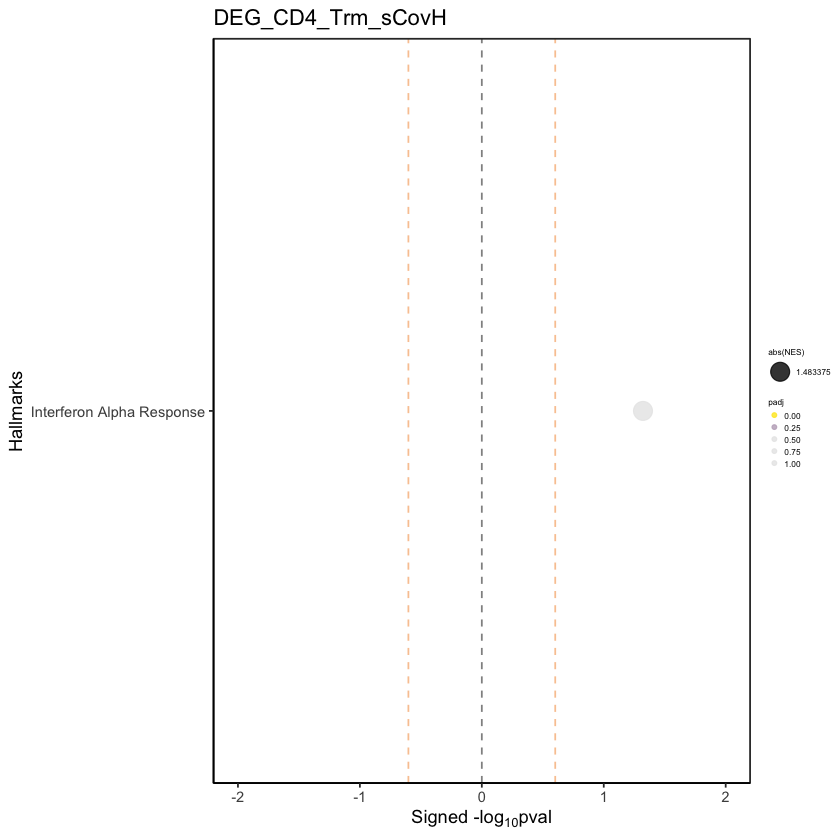

In [21]:
plot_GSEA(hallmark_res[[12]]) + ggtitle(names(ranklist[12]))

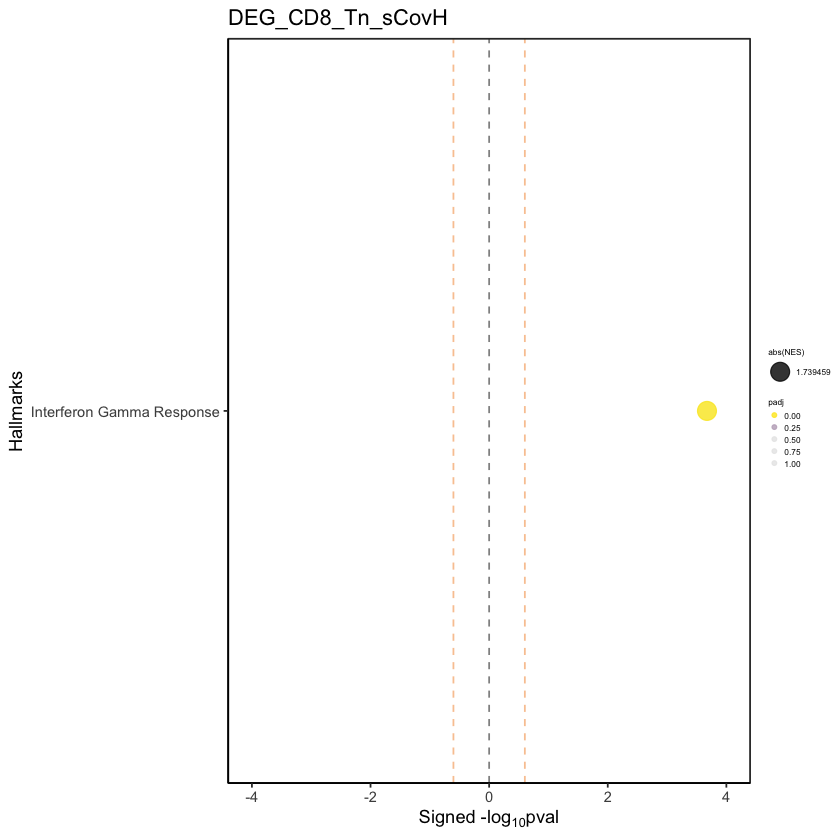

In [23]:
plot_GSEA(hallmark_res[[14]]) + ggtitle(names(ranklist[14]))

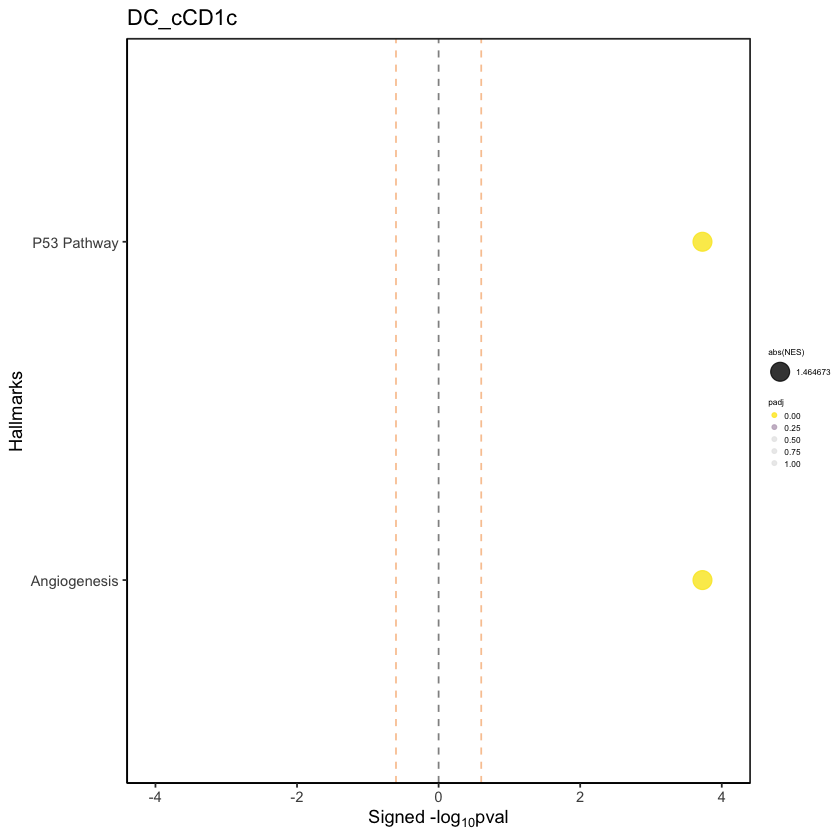

In [32]:
plot_GSEA(hallmark_res[[16]]) + ggtitle(names(ranklist[16]))

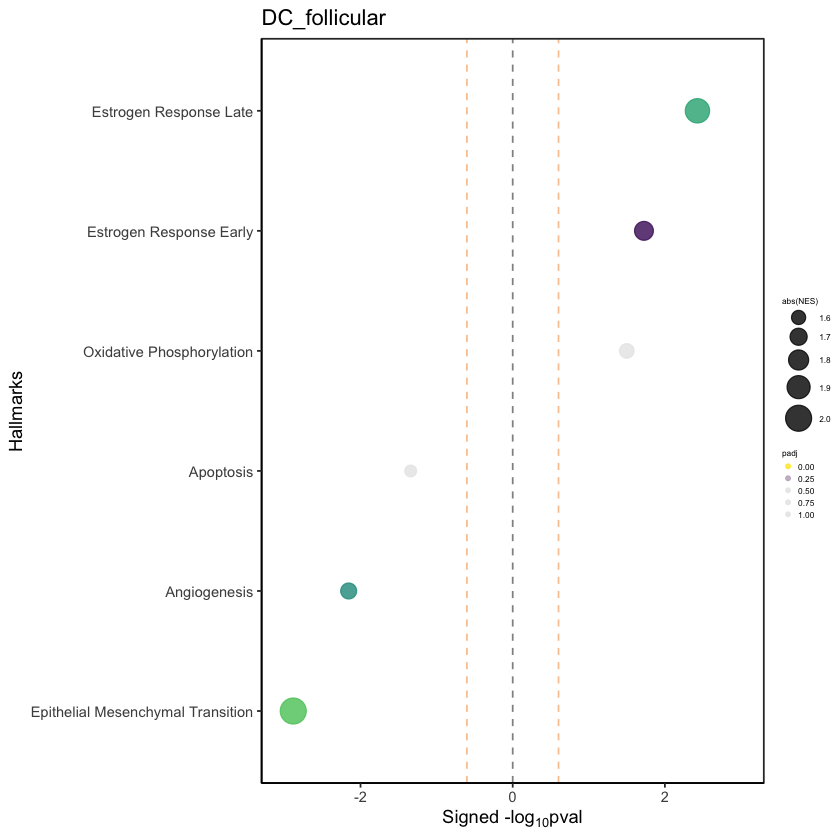

In [33]:
plot_GSEA(hallmark_res[[17]]) + ggtitle(names(ranklist[17]))

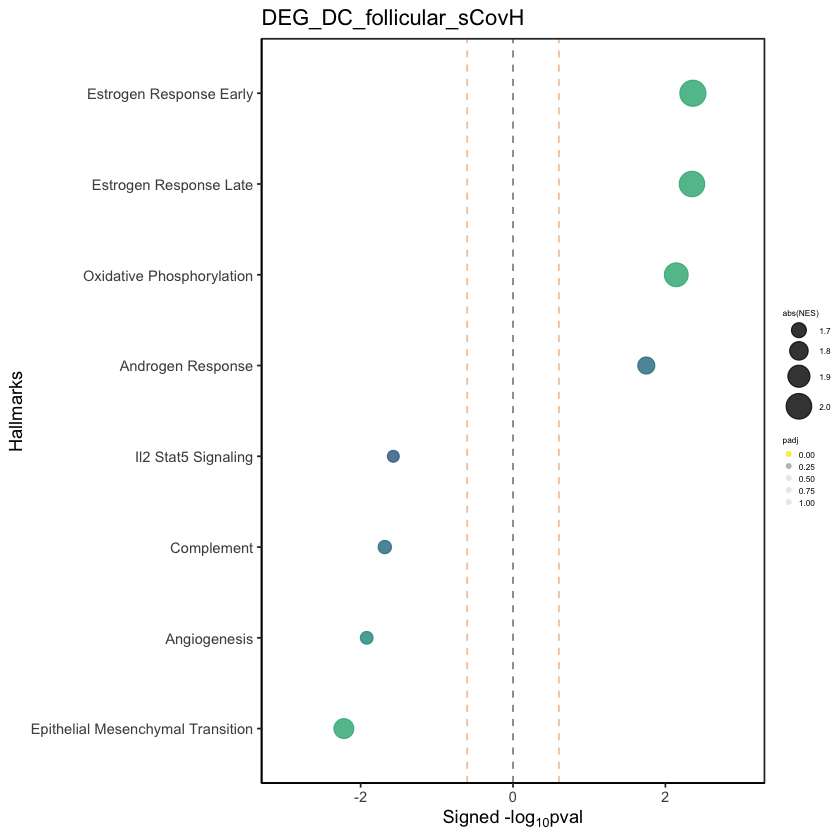

In [25]:
plot_GSEA(hallmark_res[[18]]) + ggtitle(names(ranklist[18]))

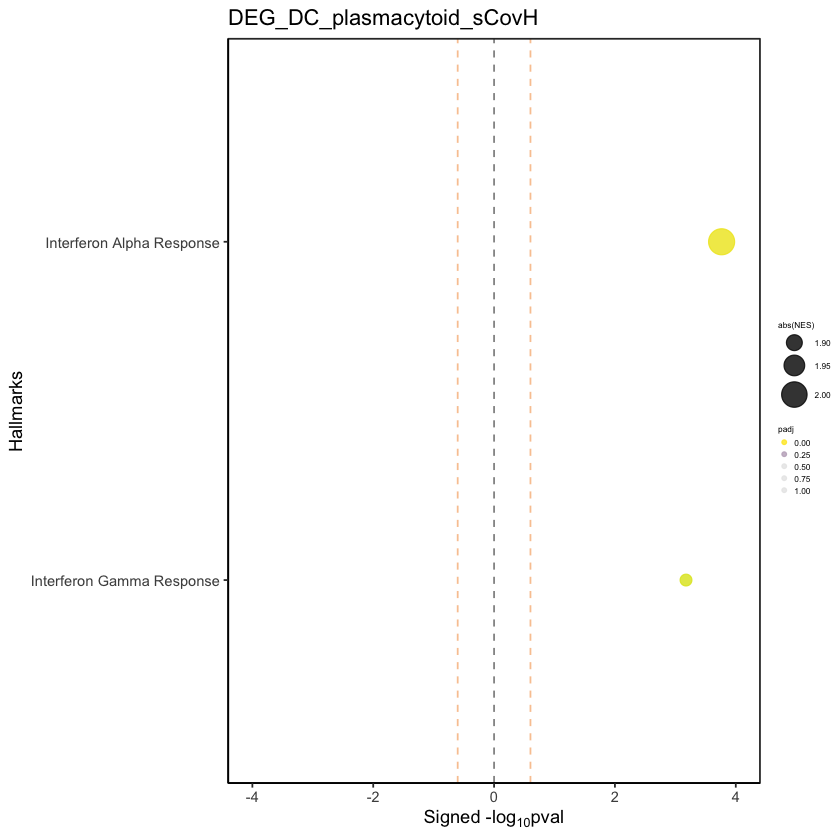

In [26]:
plot_GSEA(hallmark_res[[19]]) + ggtitle(names(ranklist[19]))

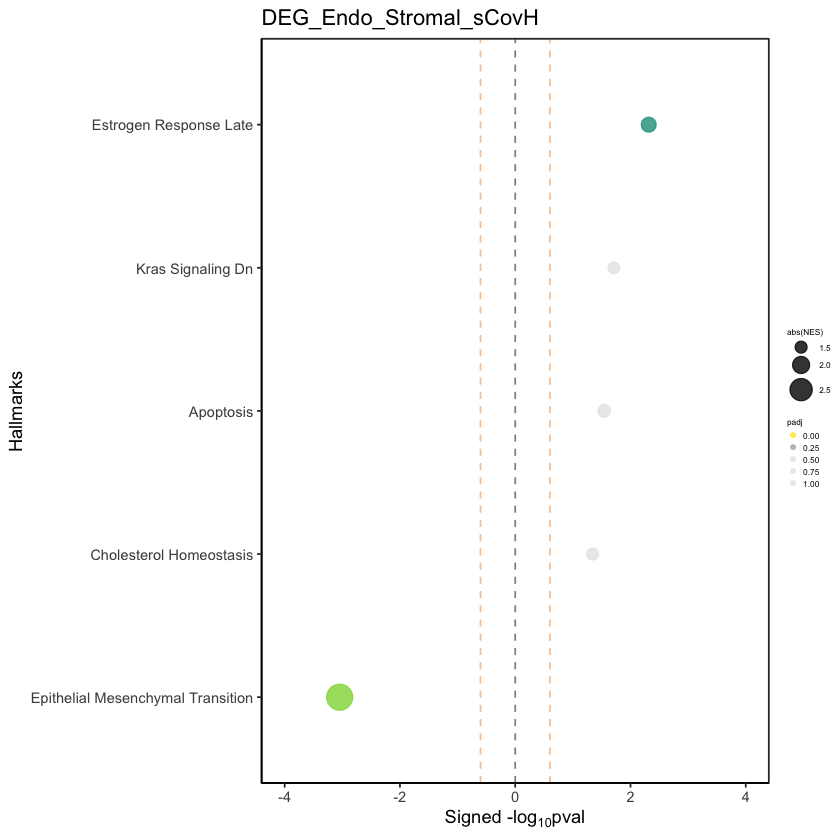

In [27]:
plot_GSEA(hallmark_res[[20]]) + ggtitle(names(ranklist[20]))

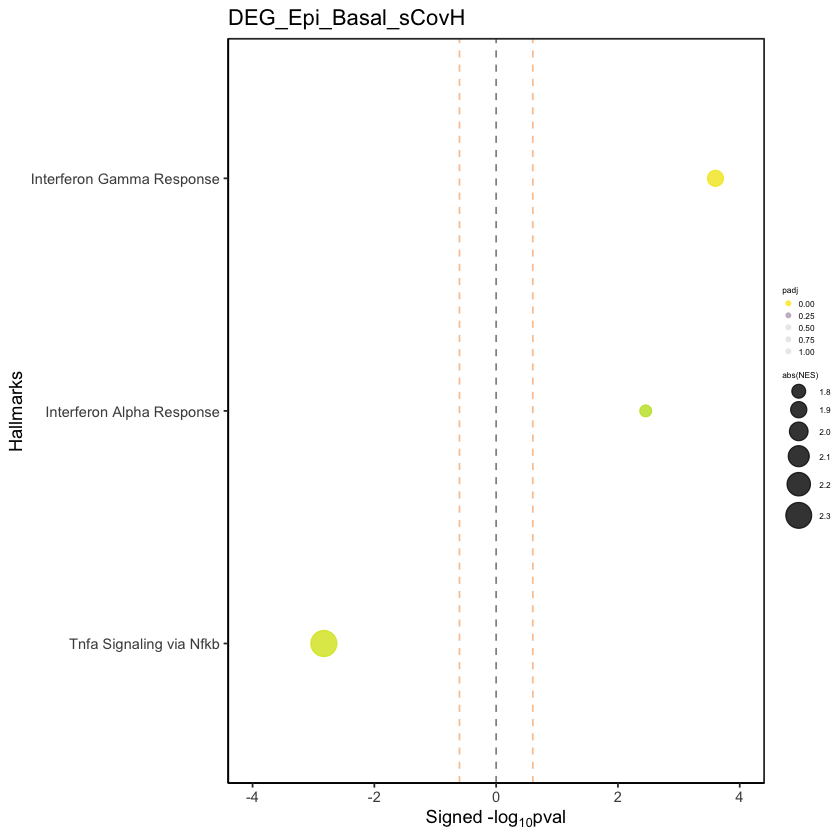

In [28]:
plot_GSEA(hallmark_res[[21]]) + ggtitle(names(ranklist[21]))

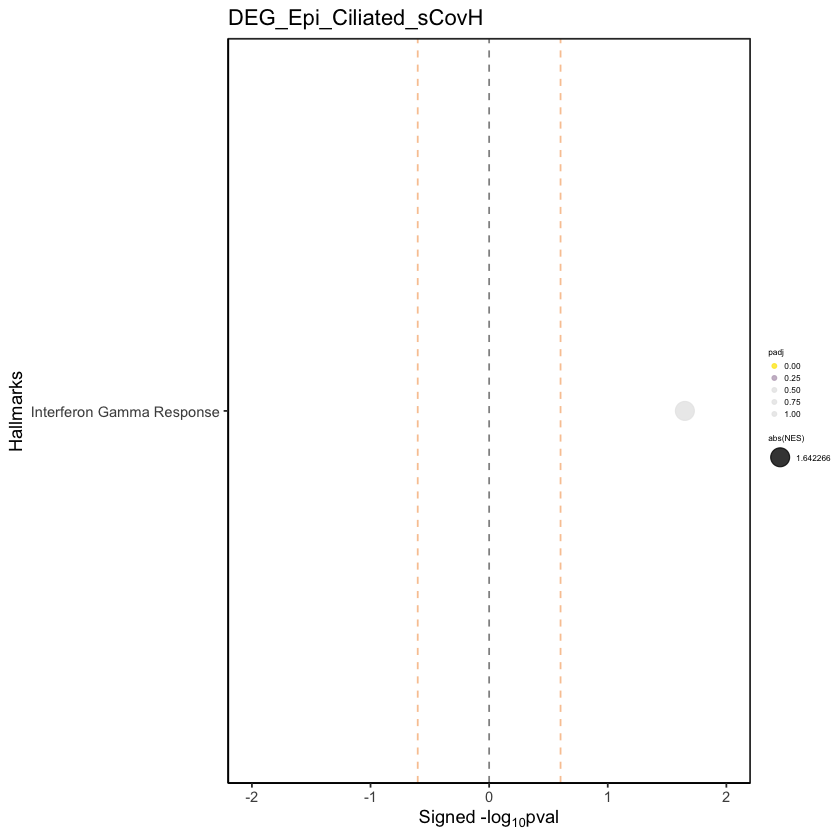

In [29]:
plot_GSEA(hallmark_res[[22]]) + ggtitle(names(ranklist[22]))

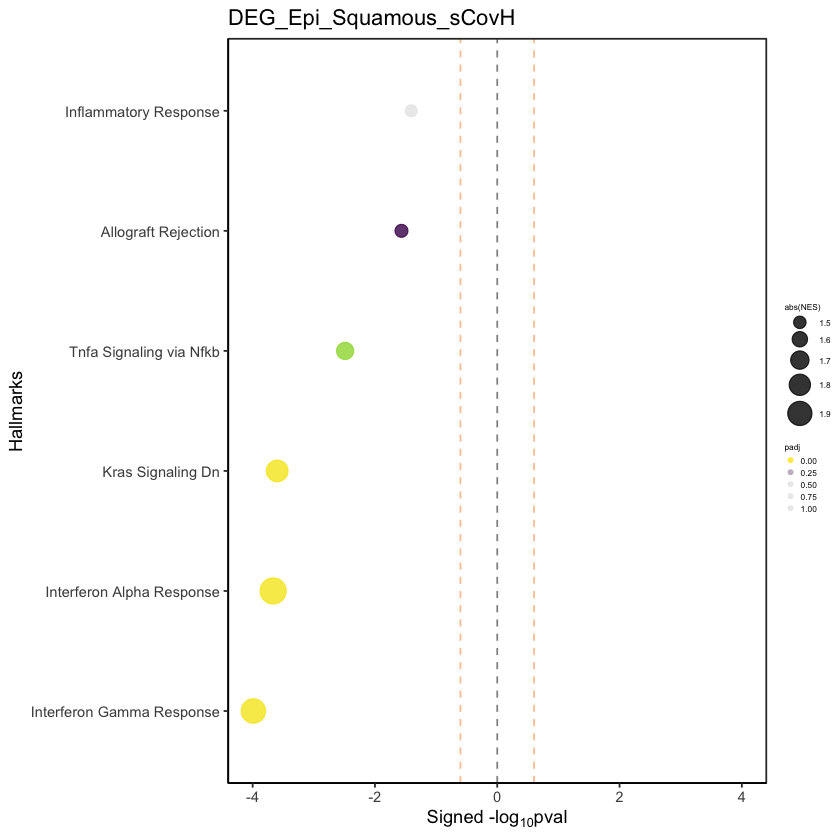

In [31]:
plot_GSEA(hallmark_res[[24]]) + ggtitle(names(ranklist[24]))

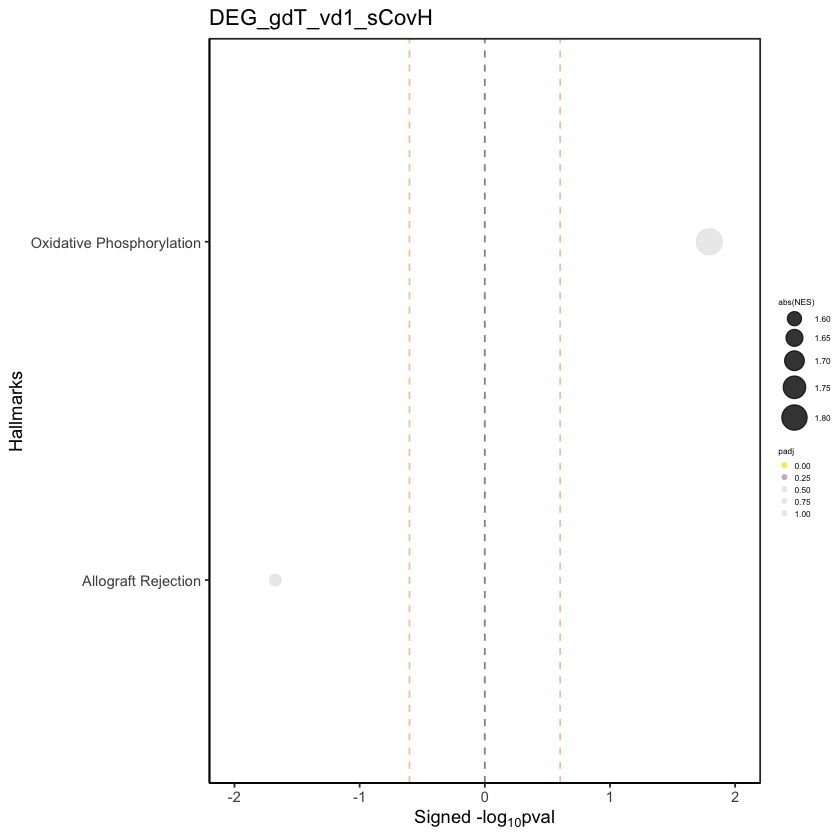

In [32]:
plot_GSEA(hallmark_res[[25]]) + ggtitle(names(ranklist[25]))

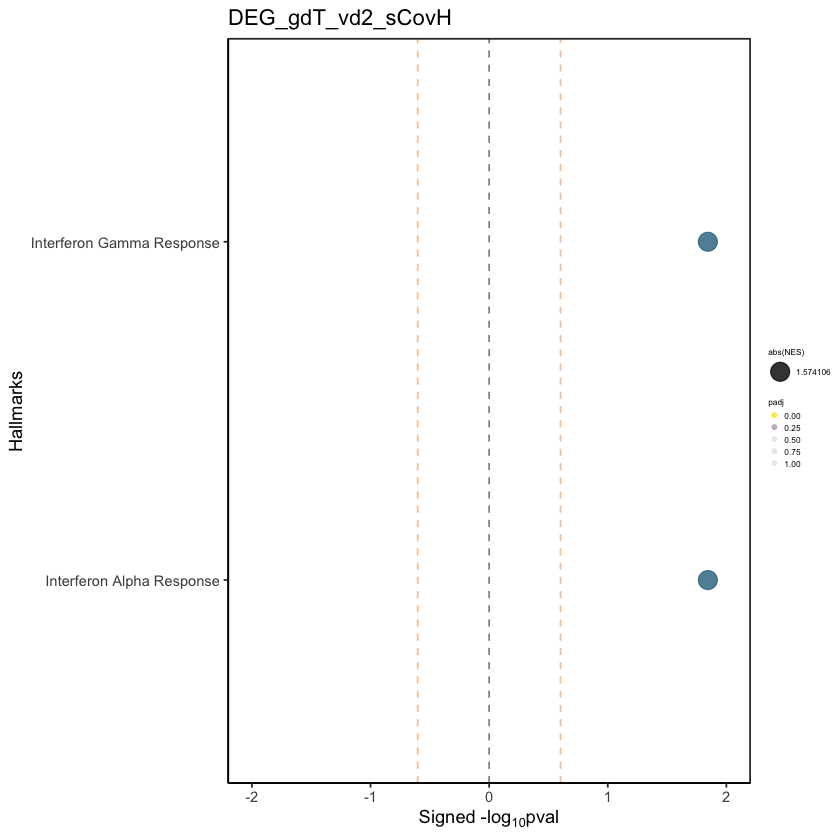

In [33]:
plot_GSEA(hallmark_res[[26]]) + ggtitle(names(ranklist[26]))

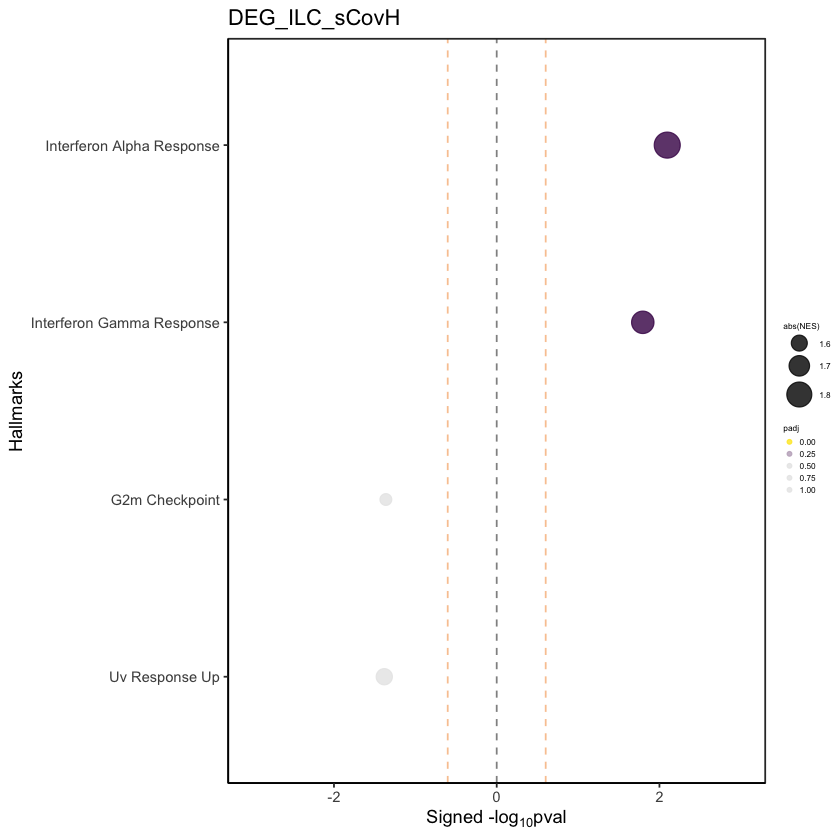

In [35]:
plot_GSEA(hallmark_res[[28]]) + ggtitle(names(ranklist[28]))

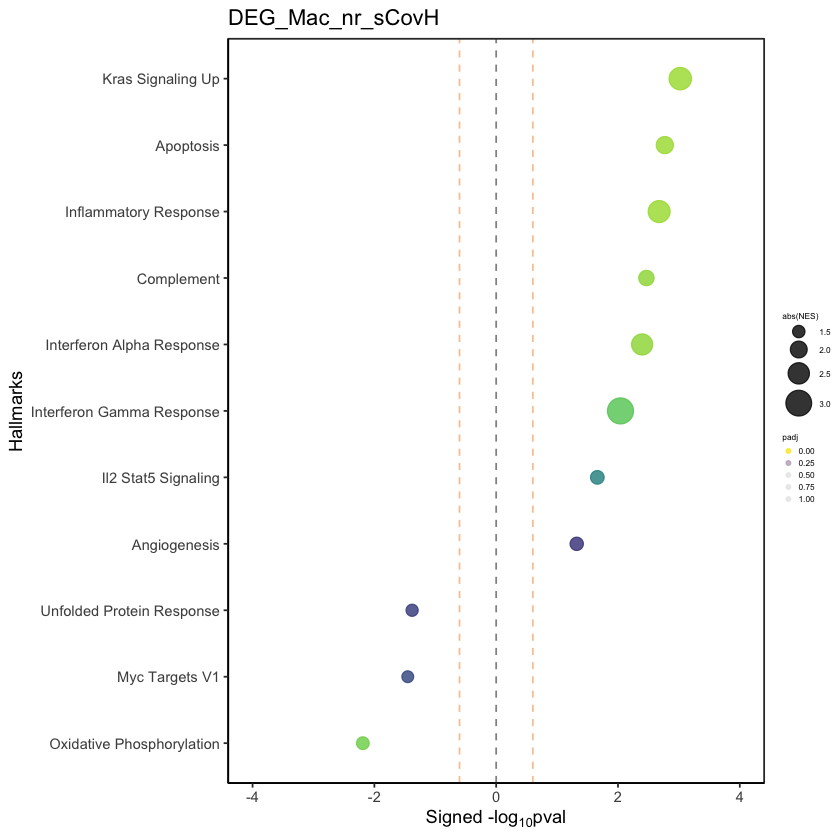

In [36]:
plot_GSEA(hallmark_res[[29]]) + ggtitle(names(ranklist[29]))

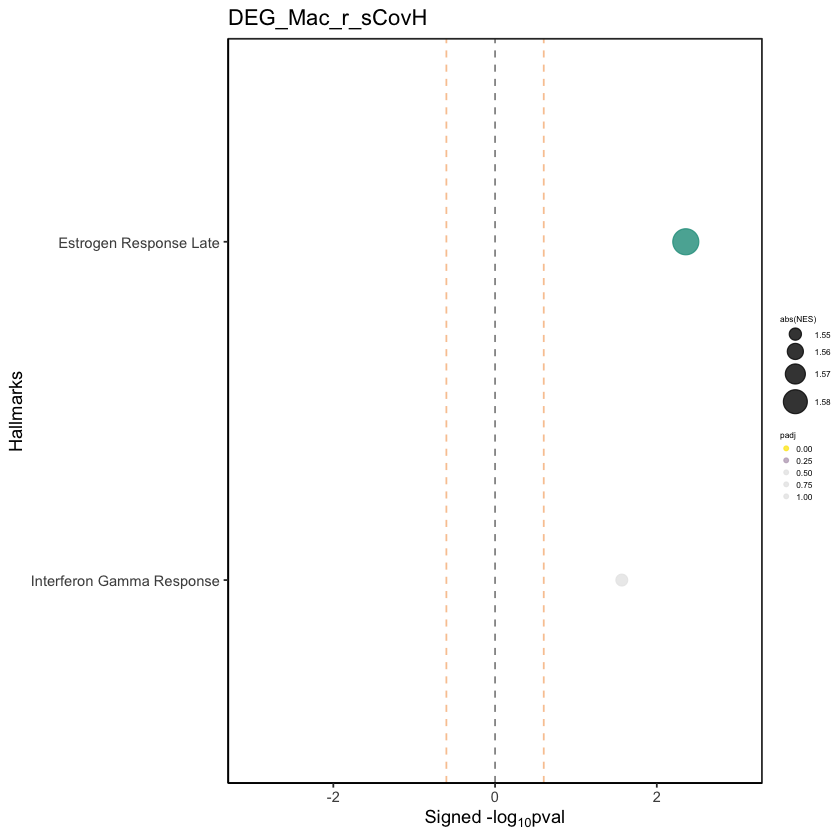

In [37]:
plot_GSEA(hallmark_res[[30]]) + ggtitle(names(ranklist[30]))

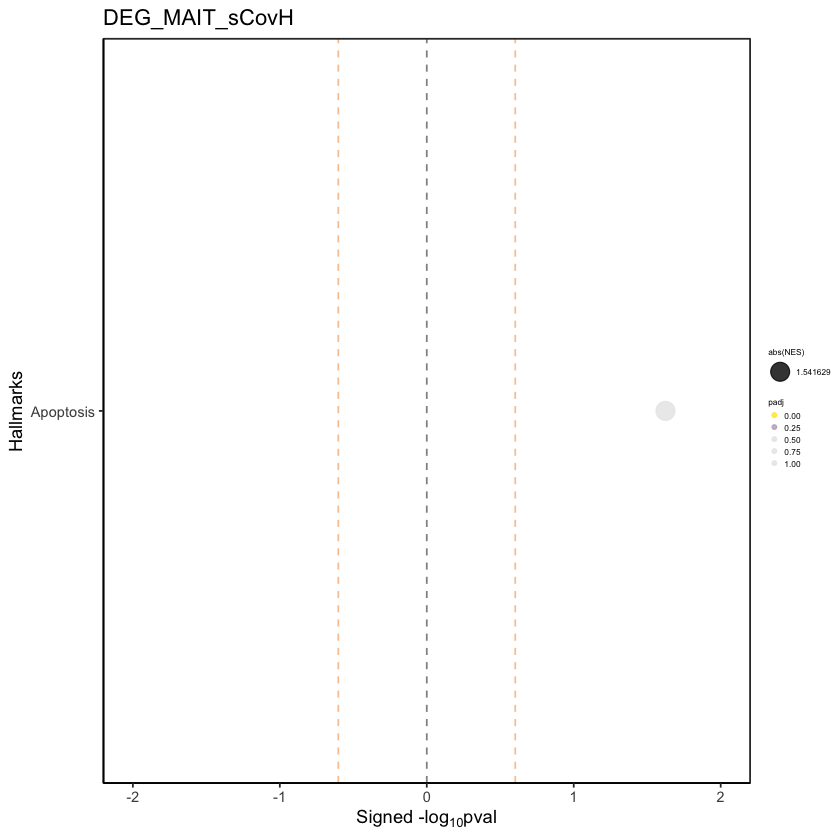

In [38]:
plot_GSEA(hallmark_res[[31]]) + ggtitle(names(ranklist[31]))

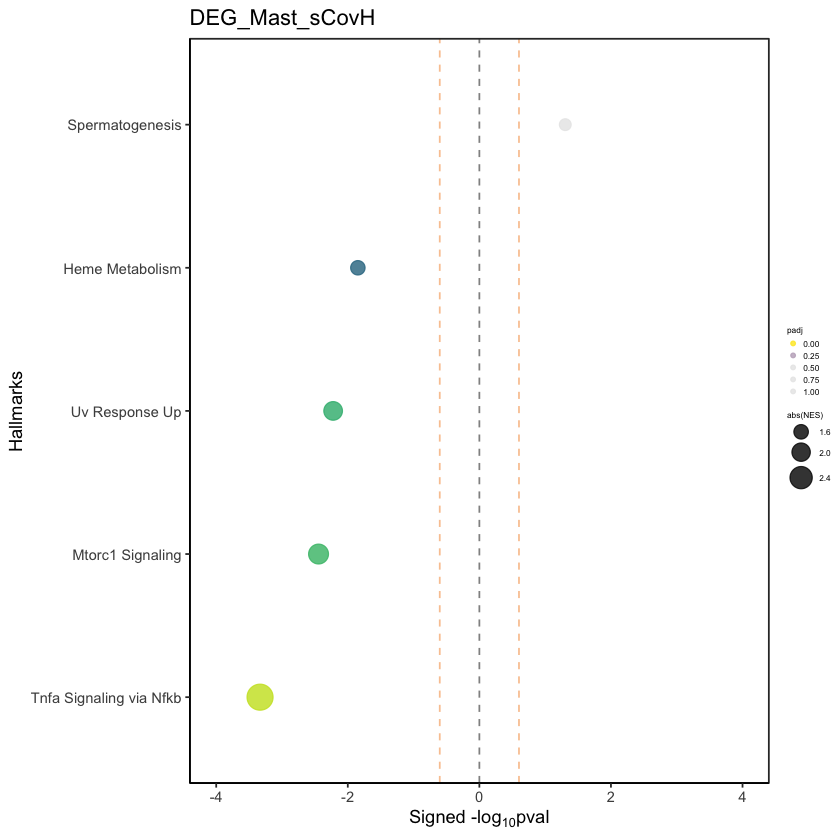

In [39]:
plot_GSEA(hallmark_res[[32]]) + ggtitle(names(ranklist[32]))

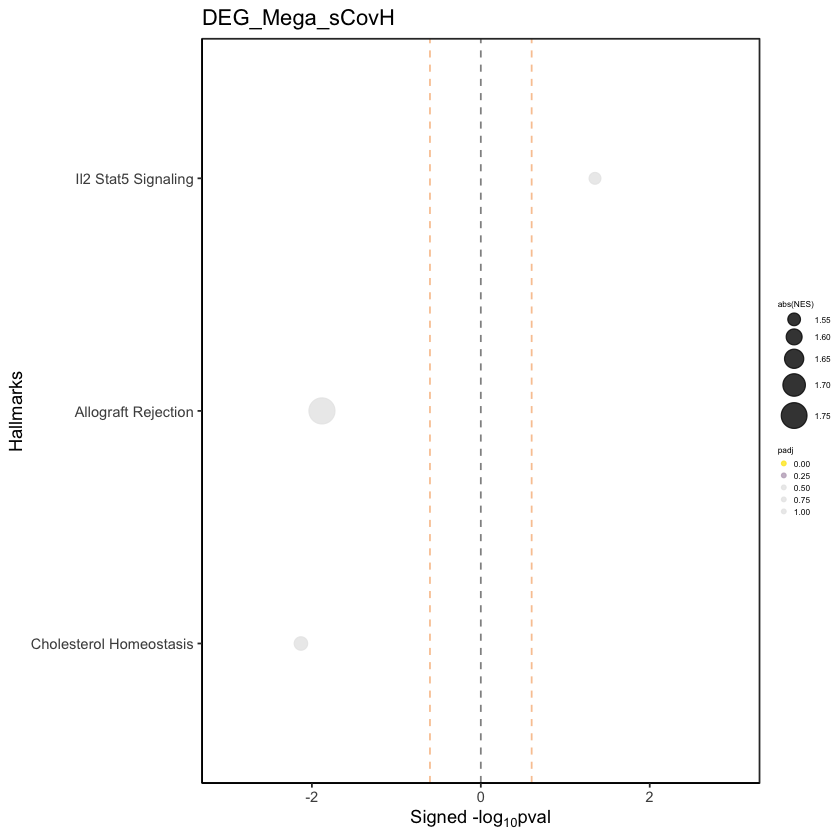

In [40]:
plot_GSEA(hallmark_res[[33]]) + ggtitle(names(ranklist[33]))

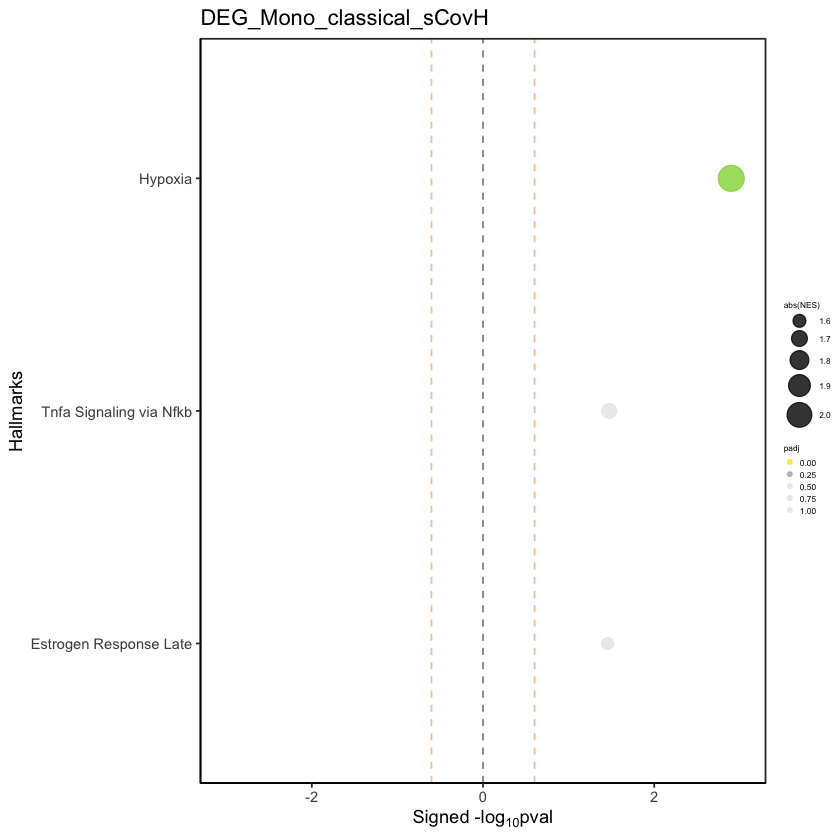

In [41]:
plot_GSEA(hallmark_res[[34]]) + ggtitle(names(ranklist[34]))

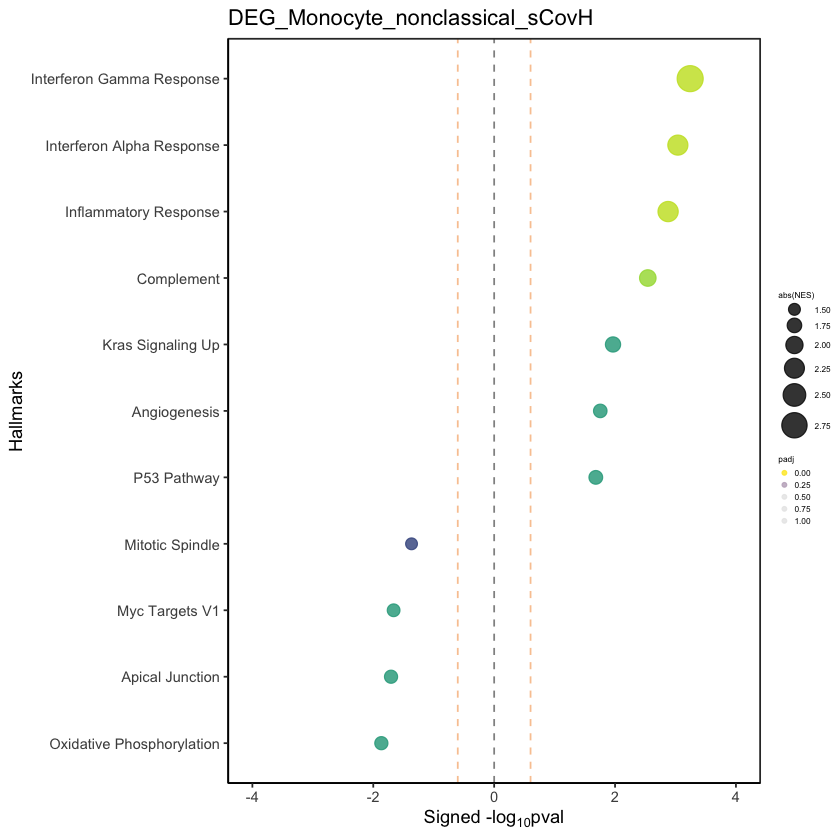

In [42]:
plot_GSEA(hallmark_res[[35]]) + ggtitle(names(ranklist[35]))

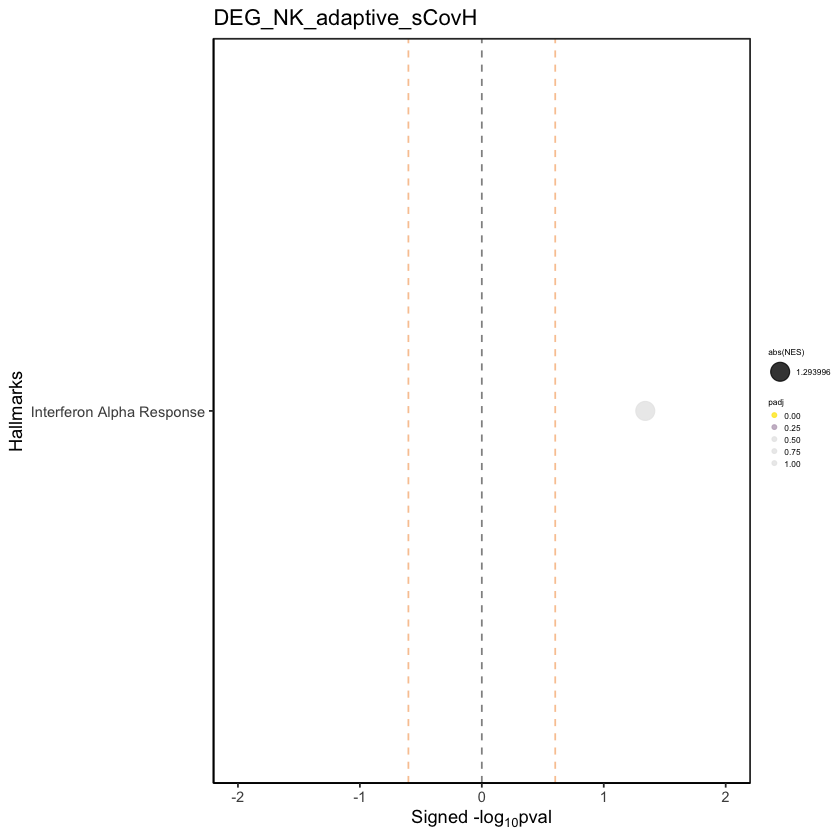

In [43]:
plot_GSEA(hallmark_res[[36]]) + ggtitle(names(ranklist[36]))

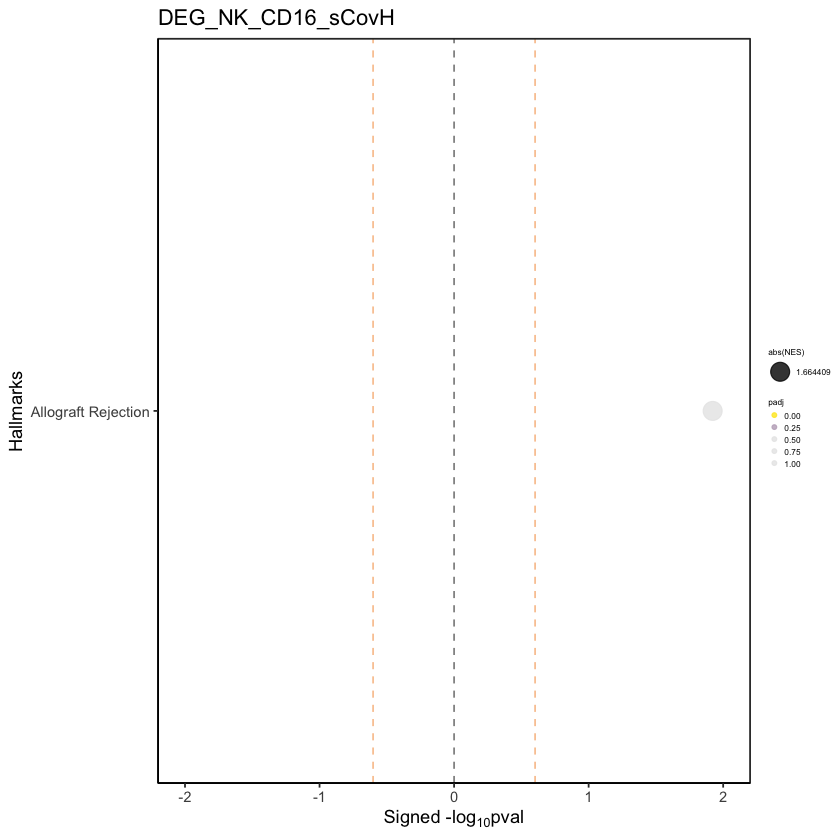

In [45]:
plot_GSEA(hallmark_res[[37]]) + ggtitle(names(ranklist[37]))

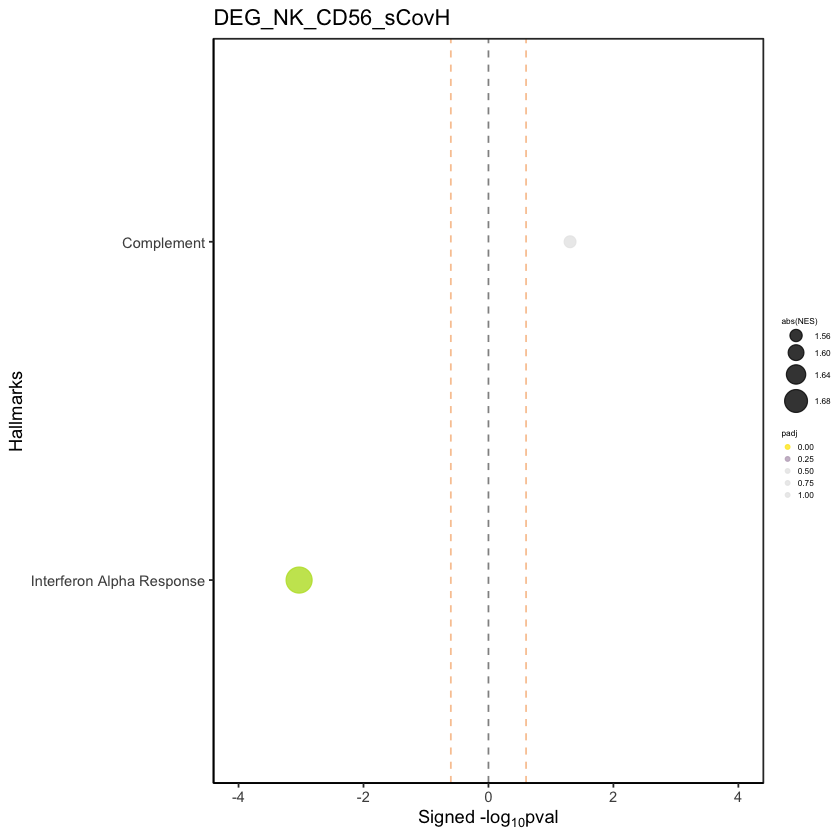

In [46]:
plot_GSEA(hallmark_res[[38]]) + ggtitle(names(ranklist[38]))

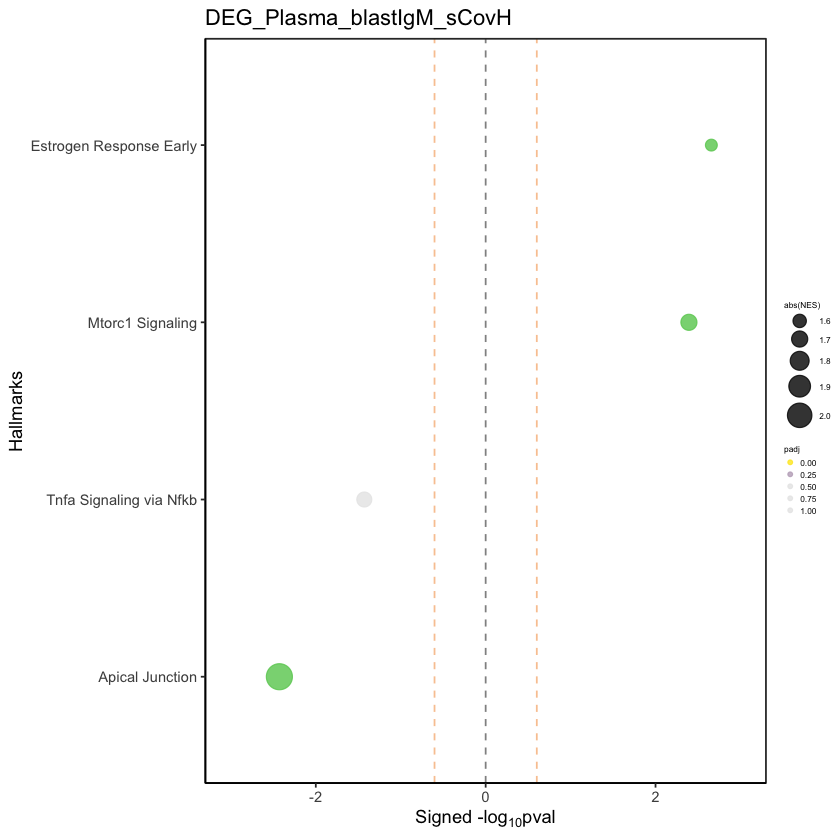

In [47]:
plot_GSEA(hallmark_res[[39]]) + ggtitle(names(ranklist[39]))

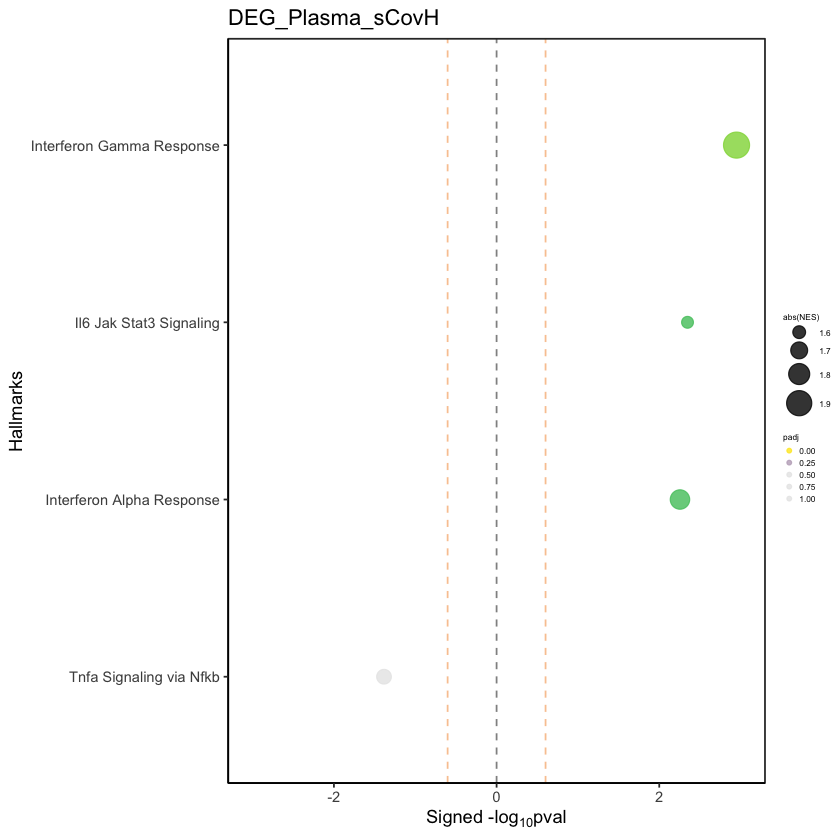

In [48]:
plot_GSEA(hallmark_res[[40]]) + ggtitle(names(ranklist[40]))

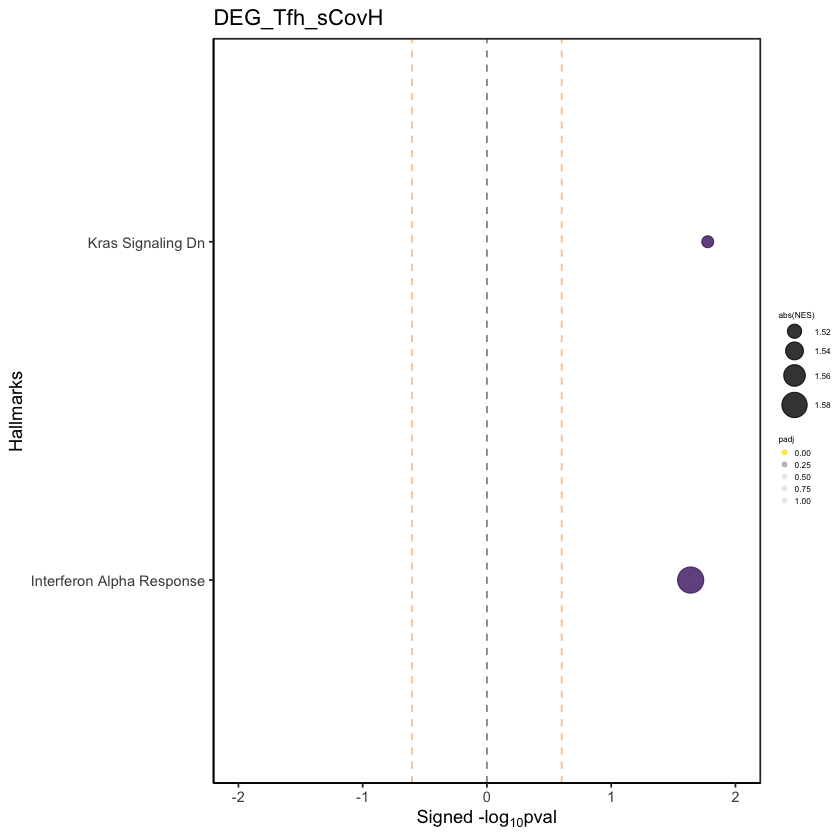

In [49]:
plot_GSEA(hallmark_res[[41]]) + ggtitle(names(ranklist[41]))

In [72]:
for (i in 1:length(ranklist)){
  hallmark_res[[i]]$label = names(ranklist)[i]
}
combined_res = do.call(rbind, hallmark_res)
row.names(combined_res) <- NULL
combined_res$leadingEdge <- do.call(c, lapply(combined_res$leadingEdge, paste, collapse = "|"))
write.csv(data.frame(combined_res), file = 'figures/dotplot/mnp_gsea_hallmark.csv')

In [73]:
?pdf